# <center>Machine Learning Project</center>

** **
## <center>*01 - Exploratory Data Analysis*</center>

** **

The members of the `team` are:
- Ana Farinha - 20211514
- Francisco Capontes - 20211692
- Sofia Gomes - 20240848
- Rui Lourenço - 2021639


## <span style="color:#568789"> Description of the project  </span> 

The New York Workers’ Compensation Board (WCB) administers and regulates workers’ compensation, disability, volunteer firefighters, volunteer ambulance workers, and volunteer civil defence workers’ benefits. As the regulating authority, the WCB is responsible for assembling and deciding on claims whenever it becomes aware of a workplace injury. Since 2000, the WCB has assembled and reviewed more than 5 million claims.

However, manually reviewing all claims is an arduous and time-consuming process. For that reason, the WCB has reached out to Nova IMS to assist them in the creation of a model that can automate the decision-making whenever a new claim is received.

## <span style="color:#568789"> Notebook  </span> 

In this notebook, we do an initial exploration of the training dataset. We start by changing the data types in the training and test datasets. Then we remove any duplicates and check the missing values. After, we do some explorations of our variables, mainly through visualizations. Our conclusions of this notebook will be used to start the preprocessing in the next notebook.

## <span style="color:#568789"> Table of Contents </span>

<a class="anchor" id="top"></a>

[1. Importing Libraries & Data](#one-bullet) <br><br>


## <span style="color:#568789"> 1. Import Libraries</span> 

The first step is to import the necessary libraries.

In [1]:
import pandas as pd
import os

# Missing Values
import missingno as msno

# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Others
from utils import *
import warnings

# Suppress specific warnings
warnings.filterwarnings("ignore", category=pd.errors.DtypeWarning)

## <span style="color:#568789"> 2. Import Datasets</span> 

Next, we start by importing the training dataset.

In [2]:
train_df = pd.read_csv('./project_data/train_data.csv')
train_df

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
0,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,...,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
1,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,...,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0
2,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,...,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0
3,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-12-30,61.0,N,2020-01-01,N,NaN,1958.0,2019-12-31,NaN,STATE INSURANCE FUND,...,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,0.0,Not Work Related,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593466,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
593467,2022-12-13,72.0,N,2022-12-31,N,0.00,1950.0,2022-12-31,NaN,TECHNOLOGY INSURANCE CO. INC.,...,25.0,FROM DIFFERENT LEVEL (ELEVATION),90.0,MULTIPLE PHYSICAL INJURIES ONLY,-9.0,MULTIPLE,12779,0.0,Not Work Related,3.0
593468,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
593469,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Following, we import the test dataset so that the simple transformations an imputations can be done in both datasets, while avoiding data leakage.

In [3]:
test_df = pd.read_csv('./project_data/test_data.csv', index_col='Claim Identifier')
test_df

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
6165911,2022-12-24,19,N,2023-01-02,N,NaN,2003.0,2023-01-02,NaN,INDEMNITY INSURANCE CO OF,...,IV,NaN,31.0,"FALL, SLIP OR TRIP, NOC",10.0,CONTUSION,54.0,LOWER LEG,10466,1
6166141,2022-11-20,19,N,2023-01-02,N,NaN,2003.0,2023-01-02,NaN,A I U INSURANCE COMPANY,...,IV,NaN,75.0,FALLING OR FLYING OBJECT,10.0,CONTUSION,10.0,MULTIPLE HEAD INJURY,11691,1
6165907,2022-12-26,59,N,2023-01-02,N,0.0,1963.0,2022-12-31,NaN,AMGUARD INSURANCE COMPANY,...,III,NaN,68.0,STATIONARY OBJECT,49.0,SPRAIN OR TEAR,62.0,BUTTOCKS,10604,0
6166047,2022-12-28,55,N,2023-01-02,N,0.0,0.0,2023-01-02,NaN,INDEMNITY INS. OF N AMERICA,...,IV,NaN,25.0,FROM DIFFERENT LEVEL (ELEVATION),10.0,CONTUSION,53.0,KNEE,11411,6
6166102,2022-12-20,25,N,2023-01-02,N,0.0,1997.0,2022-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,...,IV,NaN,79.0,OBJECT BEING LIFTED OR HANDLED,40.0,LACERATION,37.0,THUMB,11212,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6553137,2012-09-12,52,N,2024-06-05,N,NaN,1960.0,2012-10-23,NaN,STATE INSURANCE FUND,...,I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13619,5
6553119,2024-05-22,59,N,2024-06-05,Y,0.0,1965.0,NaN,2024-05-28,NYC TRANSIT AUTHORITY,...,IV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11776,1
6553542,2024-05-06,45,N,2024-06-05,Y,0.0,1979.0,NaN,NaN,STATE INSURANCE FUND,...,IV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11368,5


## <span style="color:#568789"> 3. Initial Exploration</span> 

In order to better understand the dataset, we started by exploring it.

1. Get the shape of the dataset

In [4]:
print(f'The training dataset has {train_df.shape[0]} rows and {train_df.shape[1]} columns.')

The training dataset has 593471 rows and 33 columns.


In [5]:
print(f'The test dataset has {test_df.shape[0]} rows and {test_df.shape[1]} columns.')

The test dataset has 387975 rows and 29 columns.


Above, we notice that the test dataset has 4 less columns than the training dataset.

In [6]:
[col for col in train_df.columns if col not in test_df.columns]

['Claim Identifier', 'Claim Injury Type', 'Agreement Reached', 'WCB Decision']

The first column is in the test dataset already as index. `Claim Injury Type` is our target so it does not appear in the test dataset. The other two columns also do not exist because they are supposed to be predicted in the open-ended section if we desire.

2. See the first ten lines 

In [7]:
train_df.head(10)

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
0,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,...,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
1,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,...,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0
2,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,...,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0
3,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-12-30,61.0,N,2020-01-01,N,NaN,1958.0,2019-12-31,NaN,STATE INSURANCE FUND,...,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,0.0,Not Work Related,1.0
5,2019-12-26,67.0,N,2020-01-01,N,0.00,1952.0,2019-12-31,NaN,INDEMNITY INS. OF N AMERICA,...,31.0,"FALL, SLIP OR TRIP, NOC",10.0,CONTUSION,38.0,SHOULDER(S),11772,0.0,Not Work Related,5.0
6,2019-12-28,48.0,N,2020-01-01,N,0.00,1971.0,2019-12-31,NaN,LM INSURANCE CORP,...,19.0,"CUT, PUNCTURE, SCRAPE, NOC",40.0,LACERATION,36.0,FINGER(S),13029,0.0,Not Work Related,1.0
7,2019-12-30,33.0,N,2020-01-01,N,0.00,1986.0,2019-12-31,2020-03-04,STATE INSURANCE FUND,...,99.0,"OTHER - MISCELLANEOUS, NOC",71.0,"ALL OTHER OCCUPATIONAL DISEASE INJURY, NOC",38.0,SHOULDER(S),10305,0.0,Not Work Related,6.0
8,2019-12-23,55.0,N,2020-01-01,N,0.00,1964.0,2020-01-01,NaN,"ROCHESTER, UNIVERSITY OF",...,99.0,"OTHER - MISCELLANEOUS, NOC",59.0,"ALL OTHER SPECIFIC INJURIES, NOC",60.0,LUNGS,14620,0.0,Not Work Related,6.0
9,2019-12-29,20.0,N,2020-01-01,N,225.00,NaN,2019-12-31,NaN,LM INSURANCE CORP,...,81.0,"STRUCK OR INJURED, NOC",59.0,"ALL OTHER SPECIFIC INJURIES, NOC",14.0,EYE(S),11231,0.0,Not Work Related,6.0


3. Get information about the data types in each column, non-null values and memory usage

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593471 entries, 0 to 593470
Data columns (total 33 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574026 non-null  float64
 2   Alternative Dispute Resolution      574026 non-null  object 
 3   Assembly Date                       593471 non-null  object 
 4   Attorney/Representative             574026 non-null  object 
 5   Average Weekly Wage                 545375 non-null  float64
 6   Birth Year                          544948 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574026 non-null  object 
 10  Carrier Type                        574026 non-null  object 
 11  Claim Identifier          

*General Conclusions*

Data Structure Overview
- There are 11 numerical columns (float64, int64) and 21 categorical columns (object).

Missing Data
- Several columns have missing data, such as `C-3 Date`, `IME-4 Count` and `Industry Code`. Before handling this values, we must take into account that they may exist due to lack of information or they simply do not exist.
- `OIICS Nature of Injury Description` is a variables that only contains missing values.

Date Columns
- Date columns like `Accident Date`, `Assembly Date`, `C-2 Date` and `C-3 Date` are stored as object types. These should be converted to datetime forma.


In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 387975 entries, 6165911 to 6553594
Data columns (total 29 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       385531 non-null  object 
 1   Age at Injury                       387975 non-null  int64  
 2   Alternative Dispute Resolution      387975 non-null  object 
 3   Assembly Date                       387975 non-null  object 
 4   Attorney/Representative             387975 non-null  object 
 5   Average Weekly Wage                 368771 non-null  float64
 6   Birth Year                          368505 non-null  float64
 7   C-2 Date                            378841 non-null  object 
 8   C-3 Date                            85216 non-null   object 
 9   Carrier Name                        387975 non-null  object 
 10  Carrier Type                        387975 non-null  object 
 11  County of Injury        

*General Conclusions*

Data Structure Overview
- There are 10 numerical columns (float64, int64) and 19 categorical columns (object).

Missing Data
- Several columns have missing data, such as `C-3 Date`, `IME-4 Count` and `First Hearing Date`. Before handling this values, we must take into account that they may exist due to lack of information or they simply do not exist.
- `OIICS Nature of Injury Description` is a variables that only contains missing values.

Date Columns
- Date columns like `Accident Date`, `Assembly Date`, `C-2 Date` and `C-3 Date` are stored as object types. These should be converted to datetime forma.


## <span style="color:#568789"> 4. Data Types</span> 

Above, we noticed that some datatypes are not correct. As such, we started by putting our features in the right format to start our exploration

1. Change date columns data type

Our first change was to convert all dates to the datetime format from the pandas library.

In [10]:
# Select date columns
date_cols = train_df.columns[train_df.columns.str.contains('Date')]
# Transform into date using pandas
train_df[date_cols] = train_df[date_cols].apply(pd.to_datetime)
test_df[date_cols] = test_df[date_cols].apply(pd.to_datetime)

2. Change code columns to strings

Following, we converted our `Code` features to strings so that we do not mistake them as numerical features.

In [11]:
# Select code columns
code_cols = train_df.columns[train_df.columns.str.contains('Code')]
# Transform code columns to float
train_df[code_cols] = train_df[code_cols].astype('str')
test_df[code_cols] = test_df[code_cols].astype('str')

3. Change `Age at Injury` and `Birth Year` to int

Also, the data type of the column "Age at Injury" and "Birth Year" is float, and we have to change to int

In [12]:
float_to_int(train_df, ['Age at Injury', 'Birth Year'])
float_to_int(test_df, ['Age at Injury', 'Birth Year'])

## <span style="color:#568789"> 5. Duplicates</span> 

This section is divided into two main parts: checking for duplicated `Claim Indentifier` (ID) and searching for duplicated rows.

1.  Check for duplicated IDs

This dataset contains a variable called `Claim Identifier` which should be unique to each injuty claim / row. 

In [13]:
# Search for duplicated 'Claim Identifier'
train_df['Claim Identifier'].duplicated().sum()

1

Above, it can be verified the existence of two rows with the same `Claim Identifier`.Below, we can see those two rows.

In [14]:
# Check for duplicated values in 'Claim Identifier'
duplicated_claims = train_df['Claim Identifier'].duplicated(keep=False)

train_df[duplicated_claims]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
257901,NaT,<NA>,NaN,2021-05-21,NaN,NaN,<NA>,NaT,NaT,NaN,...,nan,NaN,nan,NaN,nan,NaN,nan,NaN,NaN,NaN
526445,NaT,<NA>,NaN,2022-09-05,NaN,NaN,<NA>,NaT,NaT,NaN,...,nan,NaN,nan,NaN,nan,NaN,nan,NaN,NaN,NaN


The rows are almost empty so we decided to drop these two.

In [15]:
train_df.drop_duplicates(subset='Claim Identifier', keep=False, inplace=True)

After dropping the repeated `Claim Identifier`, the variable was set as the index.

In [16]:
train_df = train_df.set_index('Claim Identifier')

2. Search for duplicated rows

In [17]:
print(f'There are {train_df.duplicated().sum()} duplicated rows, which represent {(train_df.duplicated().sum()/len(train_df) * 100):.1f}% of the dataset')

There are 18348 duplicated rows, which represent 3.1% of the dataset


Before deciding what to do with these duplicated rows, lets explore them a bit.

In [18]:
train_df[train_df.duplicated(keep=False)].info()

<class 'pandas.core.frame.DataFrame'>
Index: 19445 entries, 957648180 to 818961390
Data columns (total 32 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Accident Date                       0 non-null      datetime64[ns]
 1   Age at Injury                       2 non-null      Int64         
 2   Alternative Dispute Resolution      2 non-null      object        
 3   Assembly Date                       19445 non-null  datetime64[ns]
 4   Attorney/Representative             2 non-null      object        
 5   Average Weekly Wage                 2 non-null      float64       
 6   Birth Year                          2 non-null      Int64         
 7   C-2 Date                            0 non-null      datetime64[ns]
 8   C-3 Date                            2 non-null      datetime64[ns]
 9   Carrier Name                        2 non-null      object        
 10  Carrier Type   

Above, we can see that from our 19445 rows, the majority is empty. `Accident Date` is the only features that has values for all rows. The remaining columns have a maximum of 2 non-null values. As such, we decided to drop these rows.

In [19]:
train_df = train_df.drop_duplicates(keep=False)

## <span style="color:#568789"> 6. Missing Values</span> 

Our next step, was to explore the remaining missing values so that we can treat them.

1. Missing Values in Target

In [20]:
train_df[train_df['Claim Injury Type'].isna()]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,


We have no missing values in our target column in our training dataset.

2. Missing Values

After, we checked for the percentage of missing values in the columns.

In [21]:
# Display the percentage of missing values per column

missing_values = train_df.isnull().sum() / len(train_df) * 100

missing_values[missing_values > 0].sort_values(ascending=False)

OIICS Nature of Injury Description    100.000000
IME-4 Count                            76.864556
First Hearing Date                     73.730018
C-3 Date                               67.380632
Birth Year                              5.065642
Average Weekly Wage                     4.991255
WCIO Part Of Body Description           2.975485
WCIO Nature of Injury Description       2.727238
WCIO Cause of Injury Description        2.724276
C-2 Date                                2.536131
Accident Date                           0.642308
dtype: float64

Columns like `OIICS Nature of Injury Description`, `IME-4 Count`, and `First Hearing Date` have over 60% missing, with some 100% missing. These may need to be removed or further investigated. Columns such as `Birth Year`, `Average Weekly Wage`, and `Zip Code` have around 5% missing and can likely be imputed. Columns like `Accident Date` and `Industry Code` have minimal missing data (below 1%) and can be imputed or removed with minimal impact.

Actions include removing columns with 100% missing data, imputing or removing columns with 60%-70% missing values, imputing columns with 2%-5% missing data, and reviewing columns with <1% missing for possible imputation or removal.


After seeing the columns with more missing values, let's check the rows.

In [22]:
# Calculate the percentage of missing values per row
missing_percentage_per_row = (train_df.isnull().sum(axis=1) / train_df.shape[1]) * 100

missing_percentage_per_row.sort_values(ascending=False)


Claim Identifier
5813427    34.375
5540624    31.250
5944177    31.250
5865689    31.250
5487082    31.250
            ...  
5513307     3.125
5997649     3.125
5513300     3.125
5997880     3.125
5514736     3.125
Length: 574024, dtype: float64

The dataset shows a wide range of missing values per row. Some rows, identified by `Claim Identifier`, have a significantly high percentage of missing values, with several rows showing 44.12% missing data. On the other hand, a few rows exhibit much lower missing percentages, as low as 2.94%. 

This indicates that a large proportion of the data for certain rows is missing, while others have relatively fewer missing values. Rows with more than 40% missing data may require special handling, such as imputation or removal, depending on the context and importance of the data.

3. **Heatmap of Missing Values**

The heatmap shows correlations between missing values in different columns, revealing if missingness in one column is associated with missingness in another.

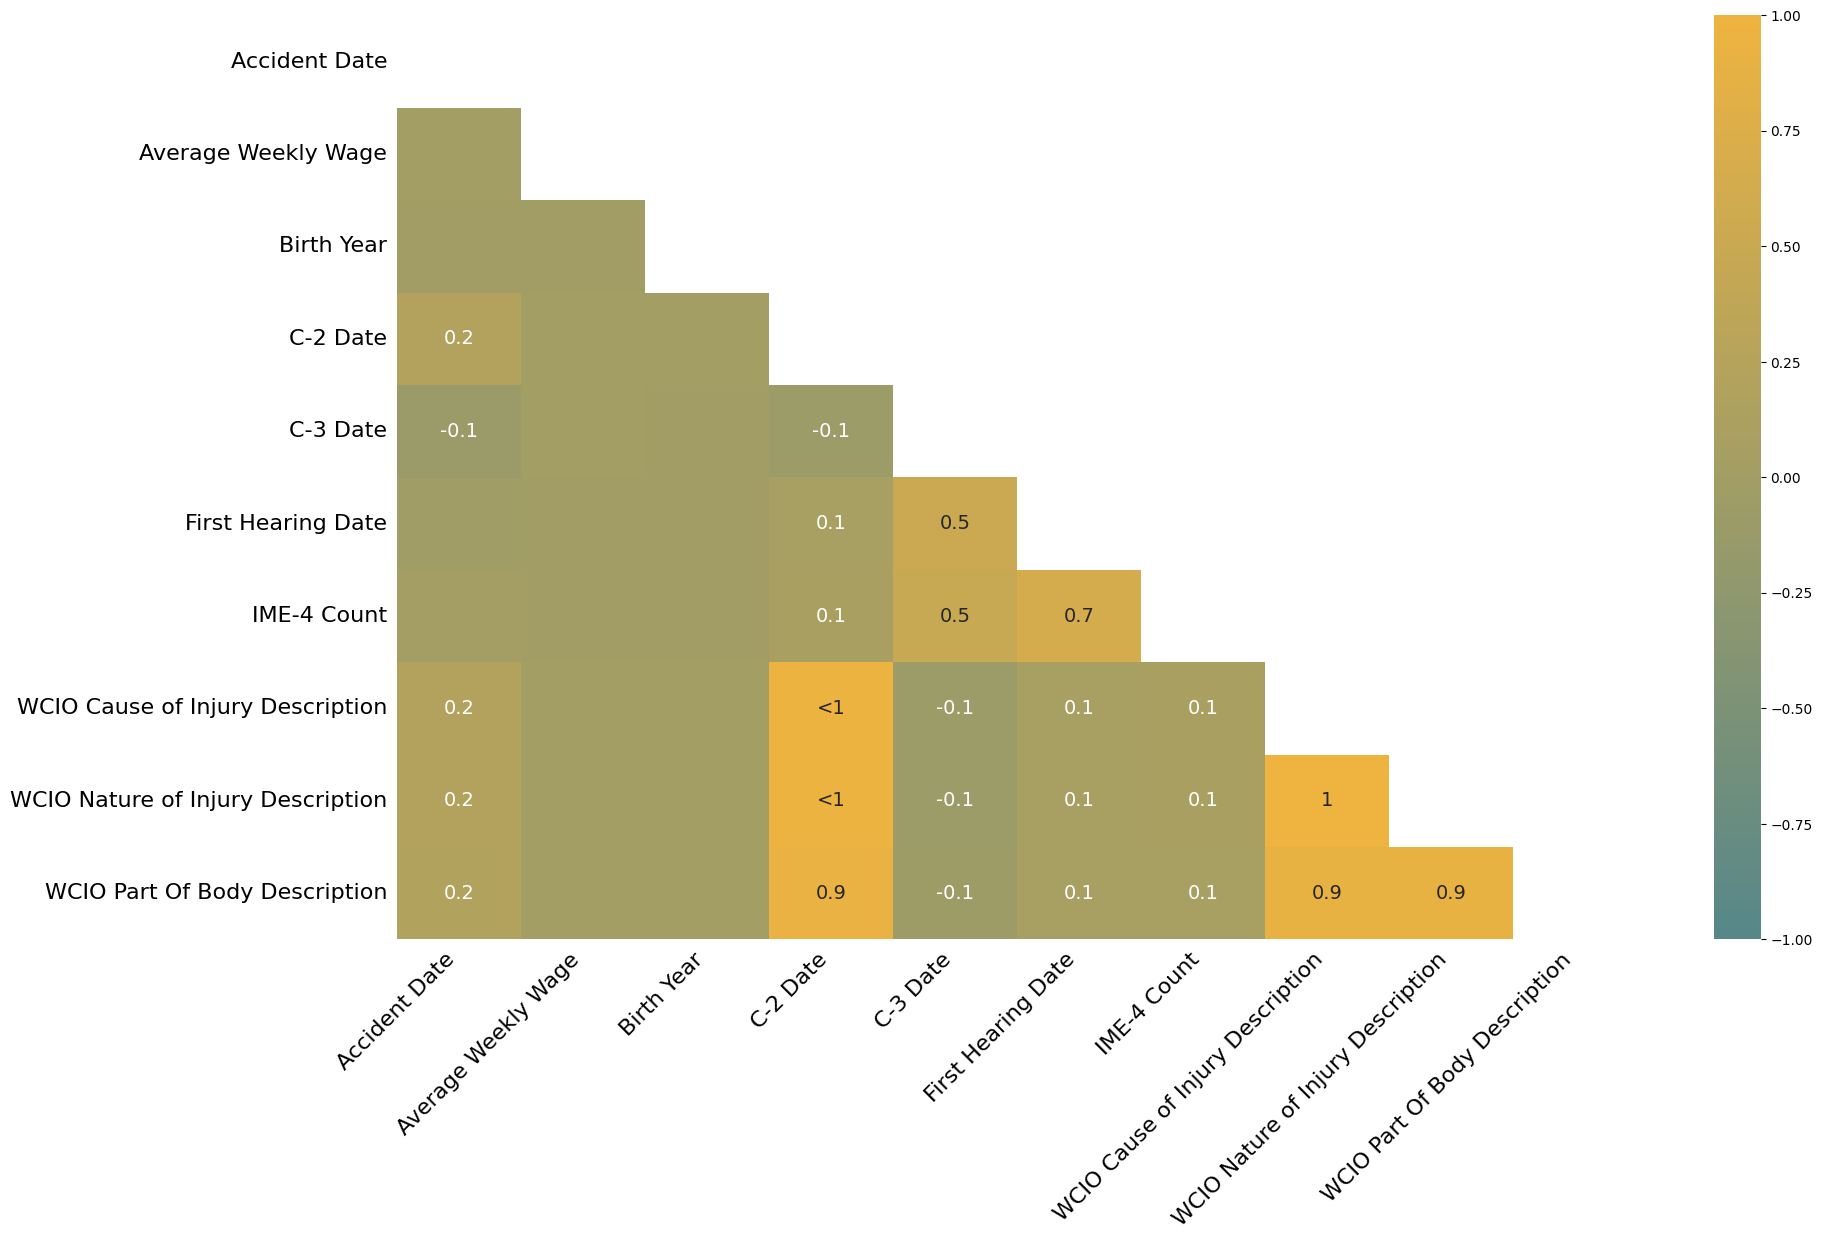

In [23]:
msno.heatmap(train_df, cmap=custom_cmap)
plt.show()

Conclusions about this heatmap:
* A high correlation 0.9, suggesting that when one is missing, the other often is too, like in WCIO
* A correlation 0.5 to 0.7 imply a weaker but still noteworthy relationship, like in WCIO and Industry code
* A correlation close to zero or negative imply little to no relationship, suggesting that missingness in one column does not predict missingness in the other, like in Accident date, average weekly wage and others

4. **Dendogram of Missing Values**

The dendrogram groups columns with similar patterns of missing values. It’s useful for identifying clusters of columns that have related missing data patterns, which might be caused by specific conditions or categories.

<Figure size 1200x600 with 0 Axes>

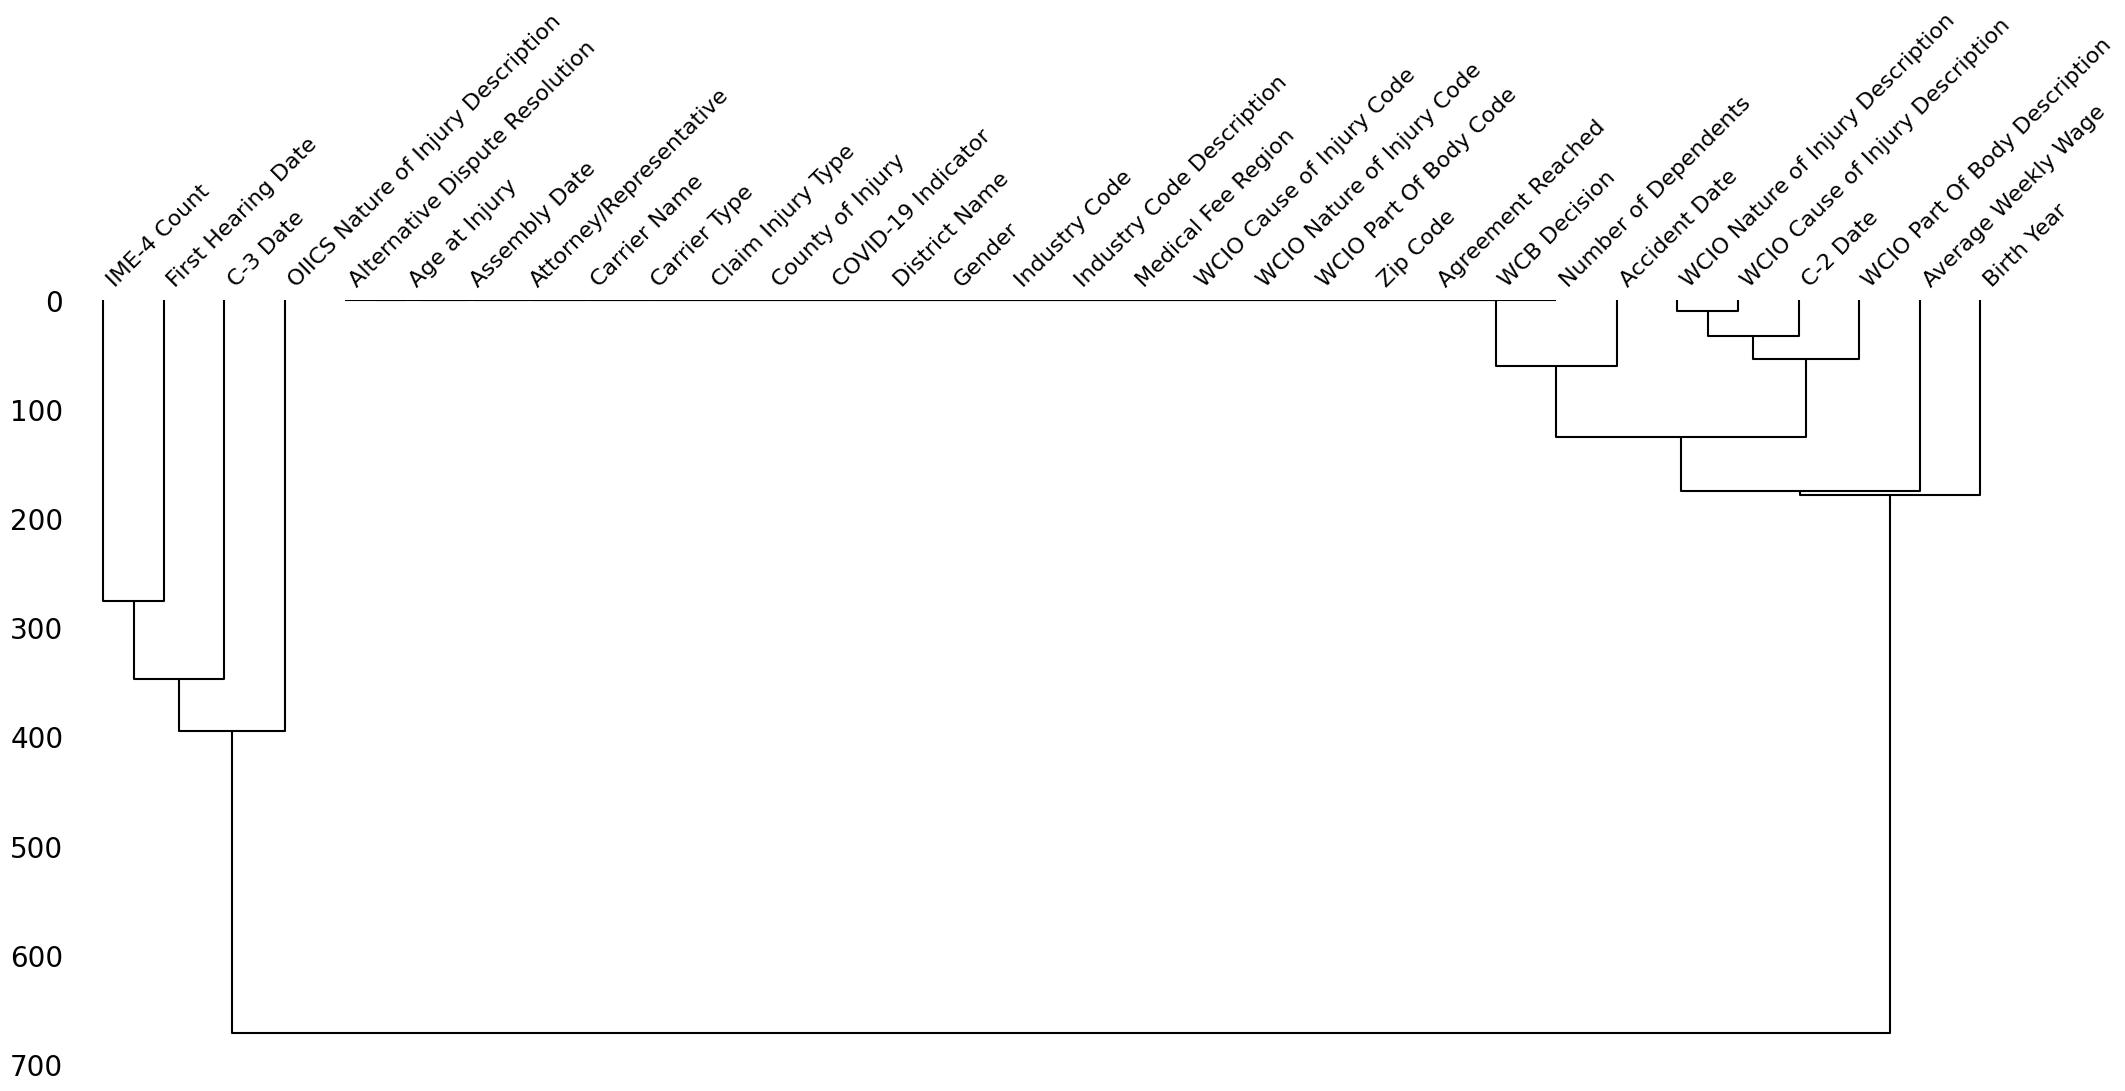

In [24]:
plt.figure(figsize=(12, 6))
msno.dendrogram(train_df)
plt.show()

Conclusions about dendrogram:
* We can divide this in two parts:
    1. IME-4 count, first hearing date, C-3 Date
    2. remaining columns

# <span style="color:yellow">FRANCISCO</span>

Explicação em cima

## <span style="color:#568789"> 7. Exploring the Features</span> 

Our next step was do a more in-depth exploration of our variables. TO do so, we started by checking the distribution of our target and separating the remaining variables by datatype to facilitate the creation of plots.

### <span style="color:#568789"> 7.1 Target Distribution</span> 

Here, we start by checking the distribution of our target variable `Claim Injury Type`. To do so, we created a frequency bar chart.

<Axes: title={'center': 'Frequency of Claim Injury Type'}, xlabel='Claim Injury Type', ylabel='Count'>

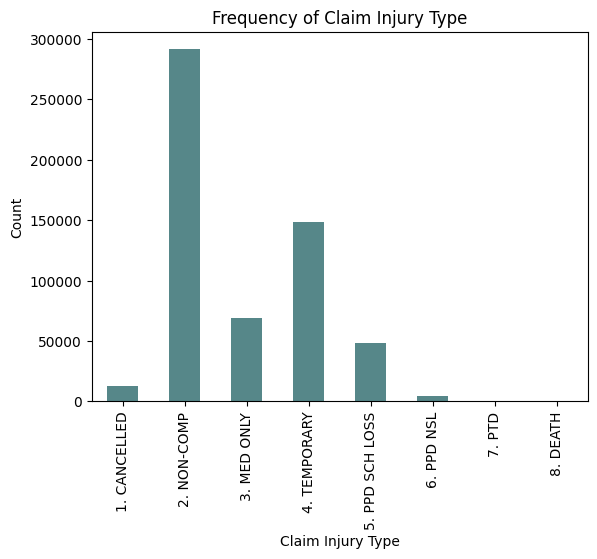

In [25]:
# Using value_counts to get counts per state and plotting
train_df['Claim Injury Type'].value_counts().sort_index().plot(
    kind='bar',
    xlabel='Claim Injury Type',
    ylabel='Count',
    title='Frequency of Claim Injury Type',
    color=plot_color
)


Conclusions about the frequency of Claim Injury type:
* There is a large discrepancy between the values
* The most frequent is NON-COMP
* The one with the lowest frequency is PTD and DEATH

### <span style="color:#568789"> 7.2 Numerical Variables </span> 

Next, we analyse our numerical variables which represent measurable quantities. <br>  
The numerical variables that exist in this dataset are:

In [26]:
numerical_features = [
    'Age at Injury', 'Average Weekly Wage', 'Birth Year', 'IME-4 Count', 'Number of Dependents'
]

In [27]:
numerical_df = train_df[numerical_features]
numerical_df

,Age at Injury,Average Weekly Wage,Birth Year,IME-4 Count,Number of Dependents
Claim Identifier,,,,,
5393875,31,0.00,1988,NaN,1.0
5393091,46,1745.93,1973,4.0,4.0
5393889,40,1434.80,1979,NaN,6.0
5393887,61,NaN,1958,NaN,1.0
5393863,67,0.00,1952,NaN,5.0
...,...,...,...,...,...
6165265,35,0.00,1987,NaN,4.0
6165285,33,0.00,1989,NaN,6.0
6165506,61,991.08,1961,1.0,3.0


Show some statistics about the numerical_df:

In [28]:
numerical_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age at Injury,574024.0,42.114417,14.25624,0.0,31.0,42.0,54.0,117.0
Average Weekly Wage,545373.0,491.090122,6092.92922,0.0,0.0,0.0,841.0,2828079.0
Birth Year,544946.0,1886.767305,414.645155,0.0,1965.0,1977.0,1989.0,2018.0
IME-4 Count,132803.0,3.207337,2.832303,1.0,1.0,2.0,4.0,73.0
Number of Dependents,574024.0,3.006569,2.000797,0.0,1.0,3.0,5.0,6.0


*Conclusions*

- **Age at Injury**: 
    - Mean age is 42.11 years with a standard deviation of 14.26
    - The ages range from 0 to 117 years, with the 25th percentile at 31, the median at 42, and the 75th percentile at 54
    - 75% of the people has 54 age at injury
- **Average Weekly Wage**: 
    - Mean weekly wage is 491.09 with a very high standard deviation of 6092.92
    - The wages range from 0 to a maximum of 2,828,079
    - 75% have an average weekly wage of 841
- **Birth Year**: 
    - The mean birth year is around 1886.77 with a standard deviation of 414.64
    - The birth years range from 0 to 2018
- **IME-4 Count**: 
    - Mean count is 3.21 with a standard deviation of 2.83
- **Number of Dependents**: 
    - Mean is 3 and the standard deviation is 2
    - The range of number of dependencies is 0 to 6



For a better understanding of the numerical_features, we did some plots:

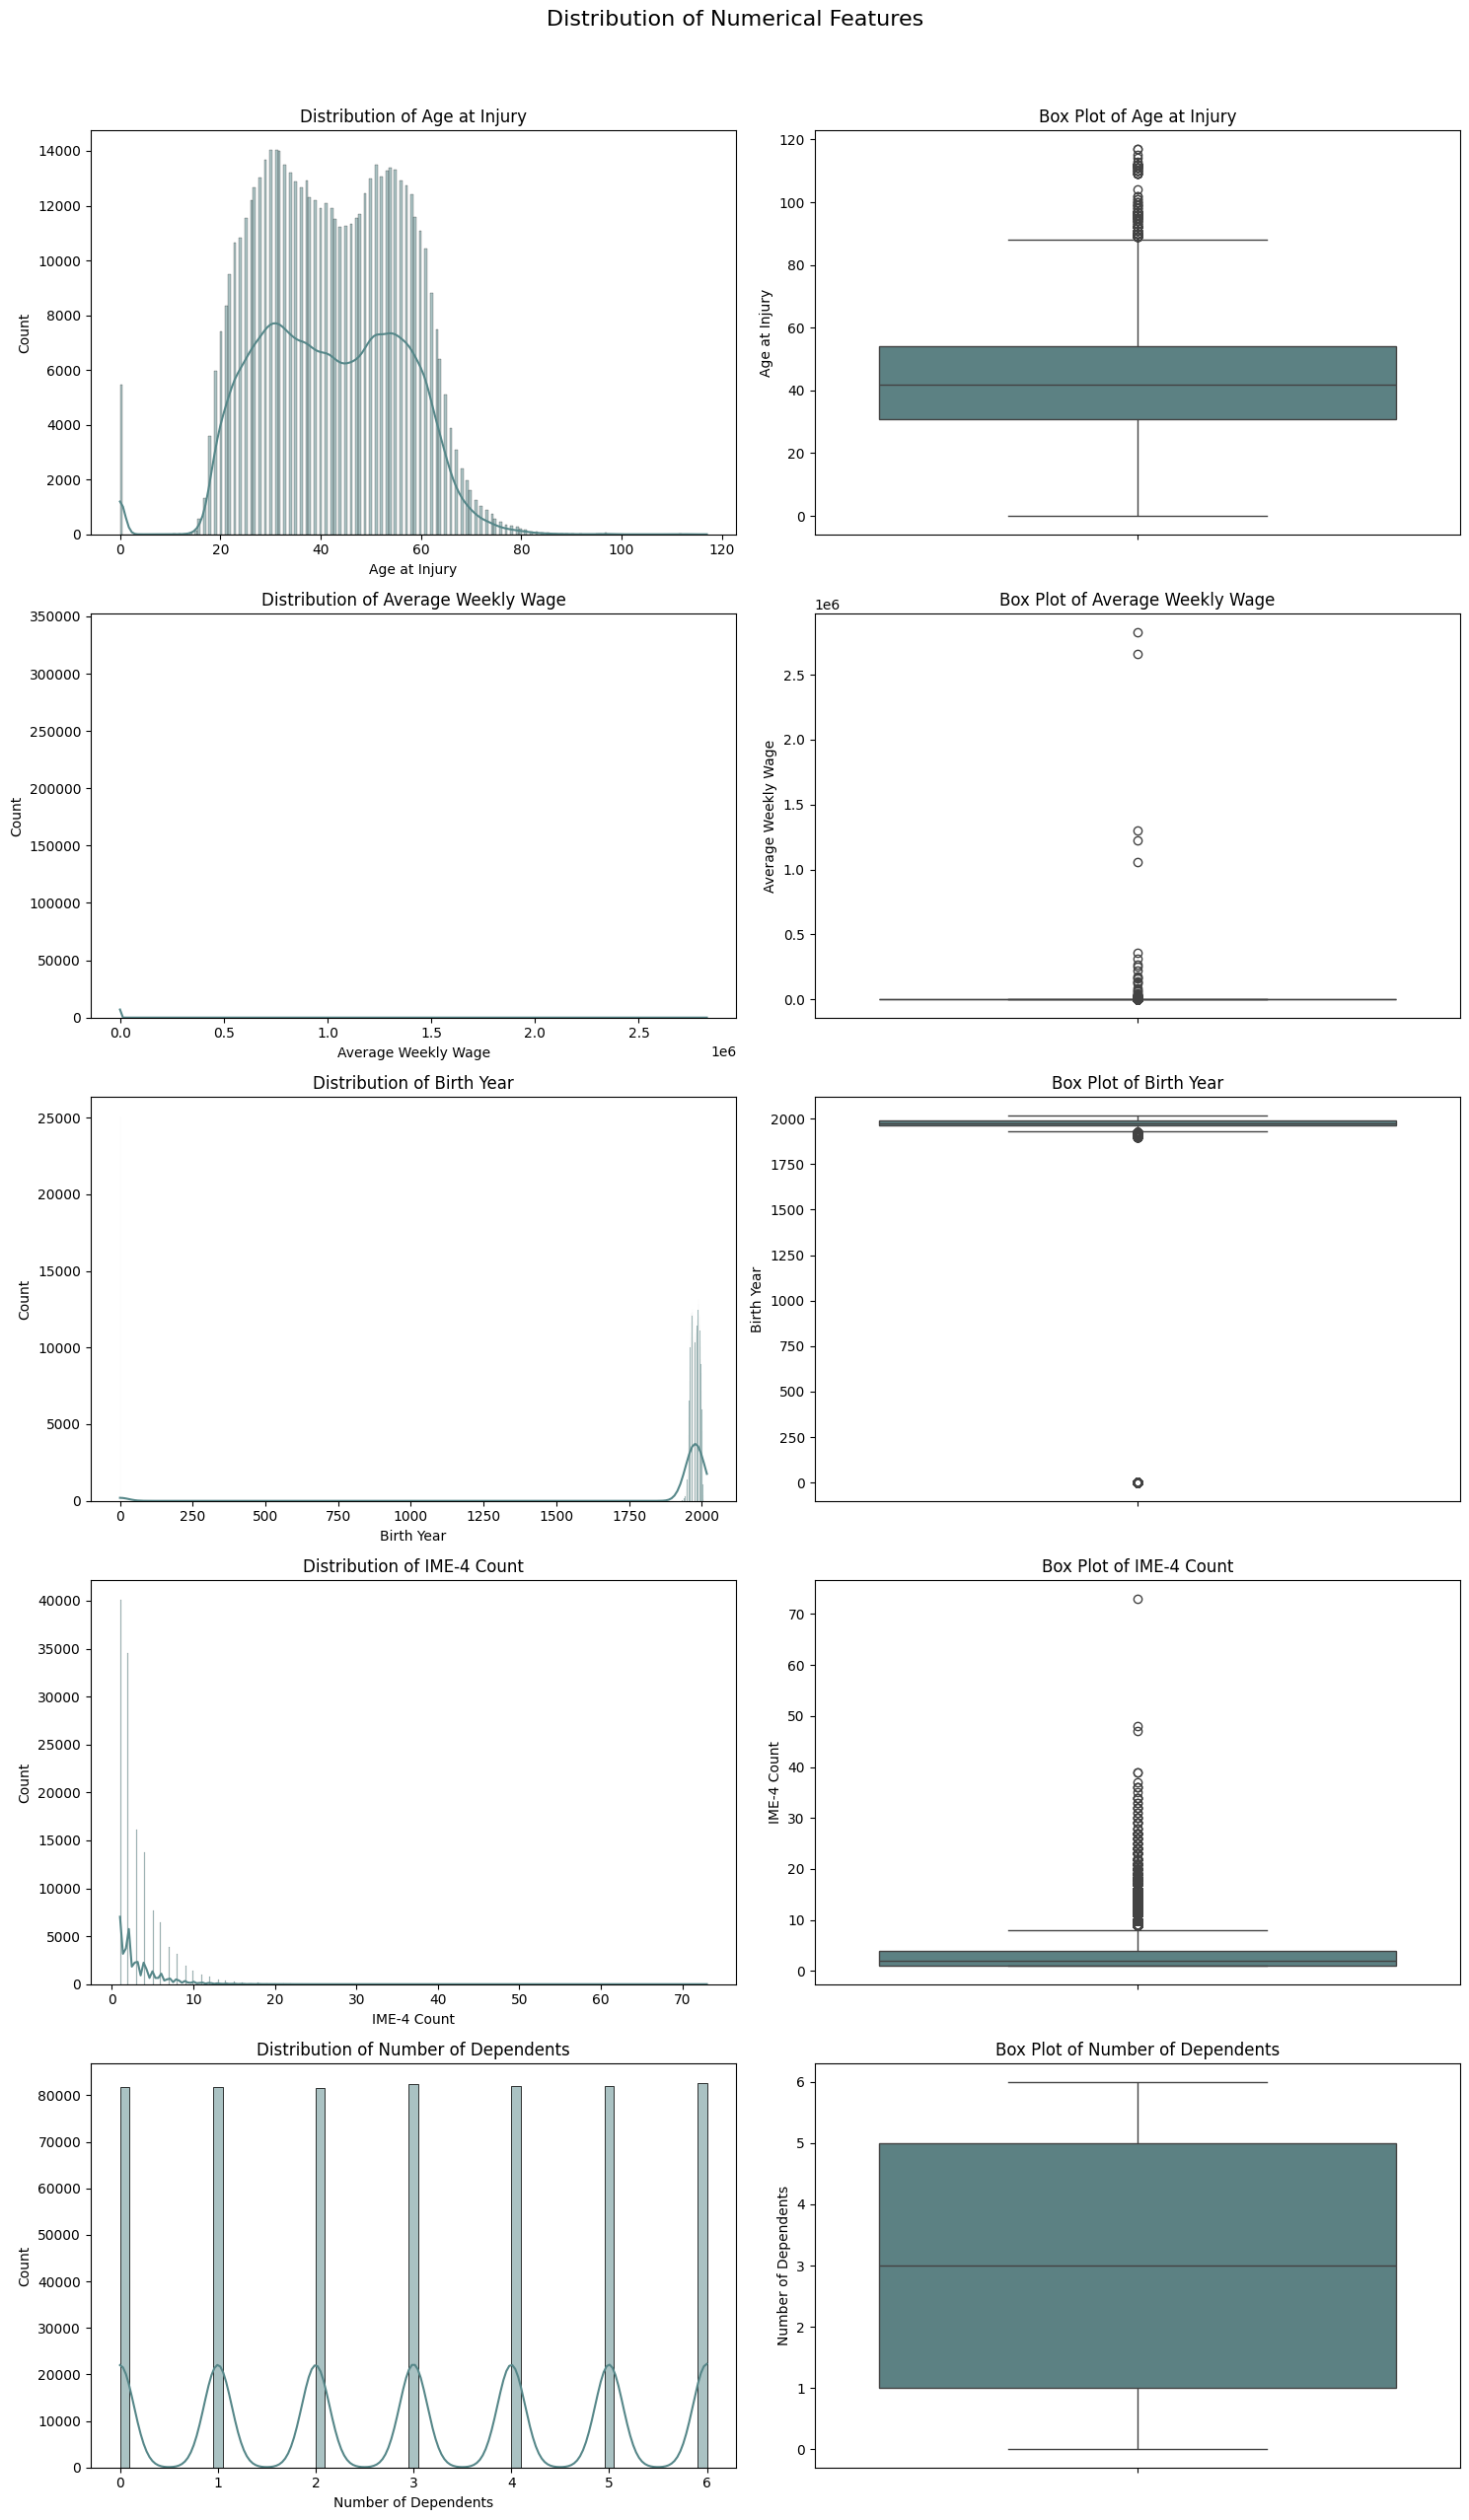

In [29]:
fig, axes = plt.subplots(len(numerical_features), 2, figsize=(15, 5*len(numerical_features)))
fig.suptitle('Distribution of Numerical Features', fontsize=16, y=1.02)

for idx, feature in enumerate(numerical_features):
    # Histogram with KDE
    sns.histplot(data=numerical_df, x=feature, kde=True, ax=axes[idx, 0], color=plot_color)
    axes[idx, 0].set_title(f'Distribution of {feature}')
    axes[idx, 0].set_xlabel(feature)
        
    # Box plot - Use the color parameter instead of palette
    sns.boxplot(data=numerical_df, y=feature, ax=axes[idx, 1], color=plot_color)
    axes[idx, 1].set_title(f'Box Plot of {feature}')
    
plt.tight_layout()
plt.show()

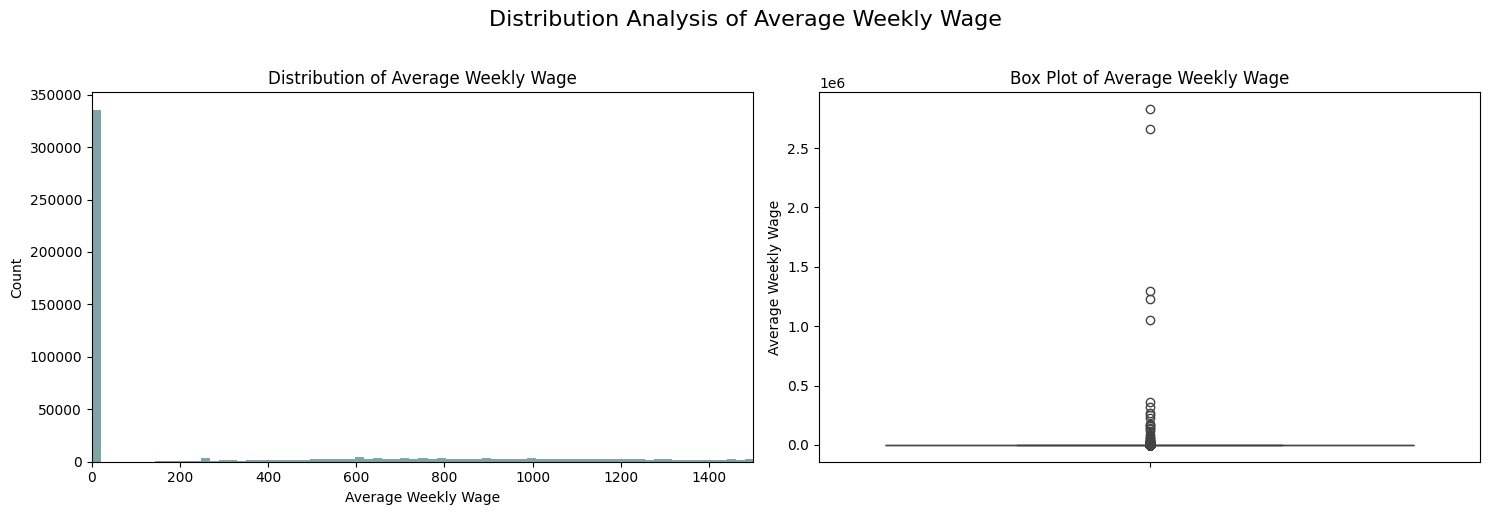

In [30]:
# Specify the feature you want to analyze
feature = "Average Weekly Wage"

# Set up a 1x2 subplot for the histogram and box plot
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle(f'Distribution Analysis of {feature}', fontsize=16, y=1.02)

# Histogram with KDE
sns.histplot(data=numerical_df, x=feature, kde=False, ax=axes[0], color=plot_color)
axes[0].set_title(f'Distribution of {feature}')
axes[0].set_xlabel(feature)

# Set x-axis limits to accommodate larger values
axes[0].set_xlim(0, 1500)  # Adjust the upper limit as needed

# Box plot
sns.boxplot(data=numerical_df, y=feature, ax=axes[1], color=plot_color)
axes[1].set_title(f'Box Plot of {feature}')

plt.tight_layout()
plt.show()


*Conclusions about plots above*

- **Age at Injury**: 
    - The distribution of ages at injury is unimodal, with peaks around 30 and 60 years old.
    - Most injuries occur between 20 and 60 years of age.
    - There are outliers in the data, including some extremely high values that may be inaccurate.
- **Average Weekly Wage**: 
    - A significant portion of the data has an average weekly wage of 0.0, indicating potential missing or incorrect data.
- **Birth Year**: 
    - The data contains an invalid birth year of 0.
- **IME-4 Count**: 
    - A majority of the IME-4 Count values are missing(NaN).
- **Number of Dependents**: 
    - The distribution of the number of dependents is relatively uniform, with values ranging from 0 to 6.
    - The majority of the values are between the 1 and 5 dependents



We then created correlation matrix of numerical features.

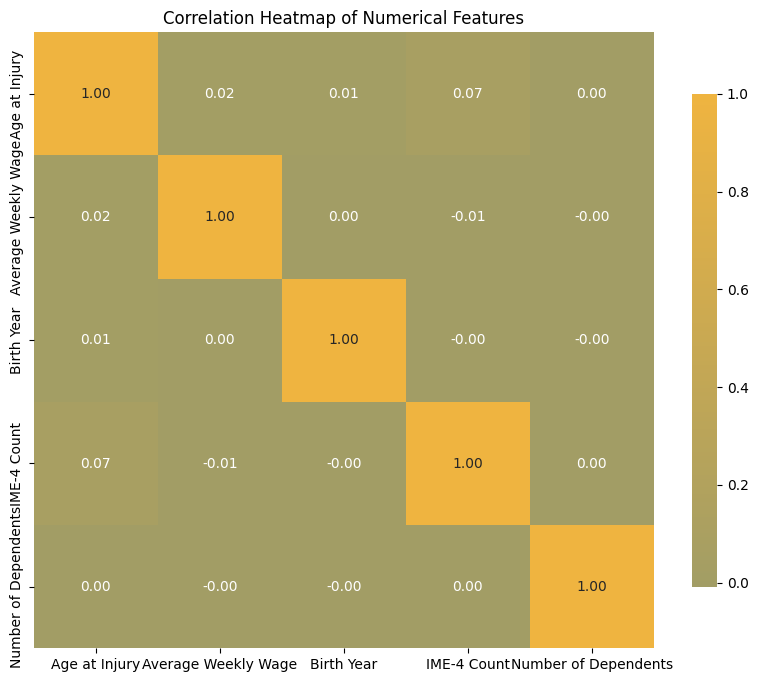

In [31]:
# Plot the heatmap with the custom gradient colormap
plt.figure(figsize=(10, 8))
correlation_matrix = numerical_df.corr()

sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap=custom_cmap,  # Apply the custom gradient colormap
            center=0,
            fmt='.2f',
            cbar_kws={"shrink": .8})  # Adjust color bar size if needed

plt.title('Correlation Heatmap of Numerical Features')
plt.show()


As we can see above, there is practically no correlation between our numerical variables.

After, we decided to do some scatter plots for age-related and financial features to see if we can get any non-linear relationship.

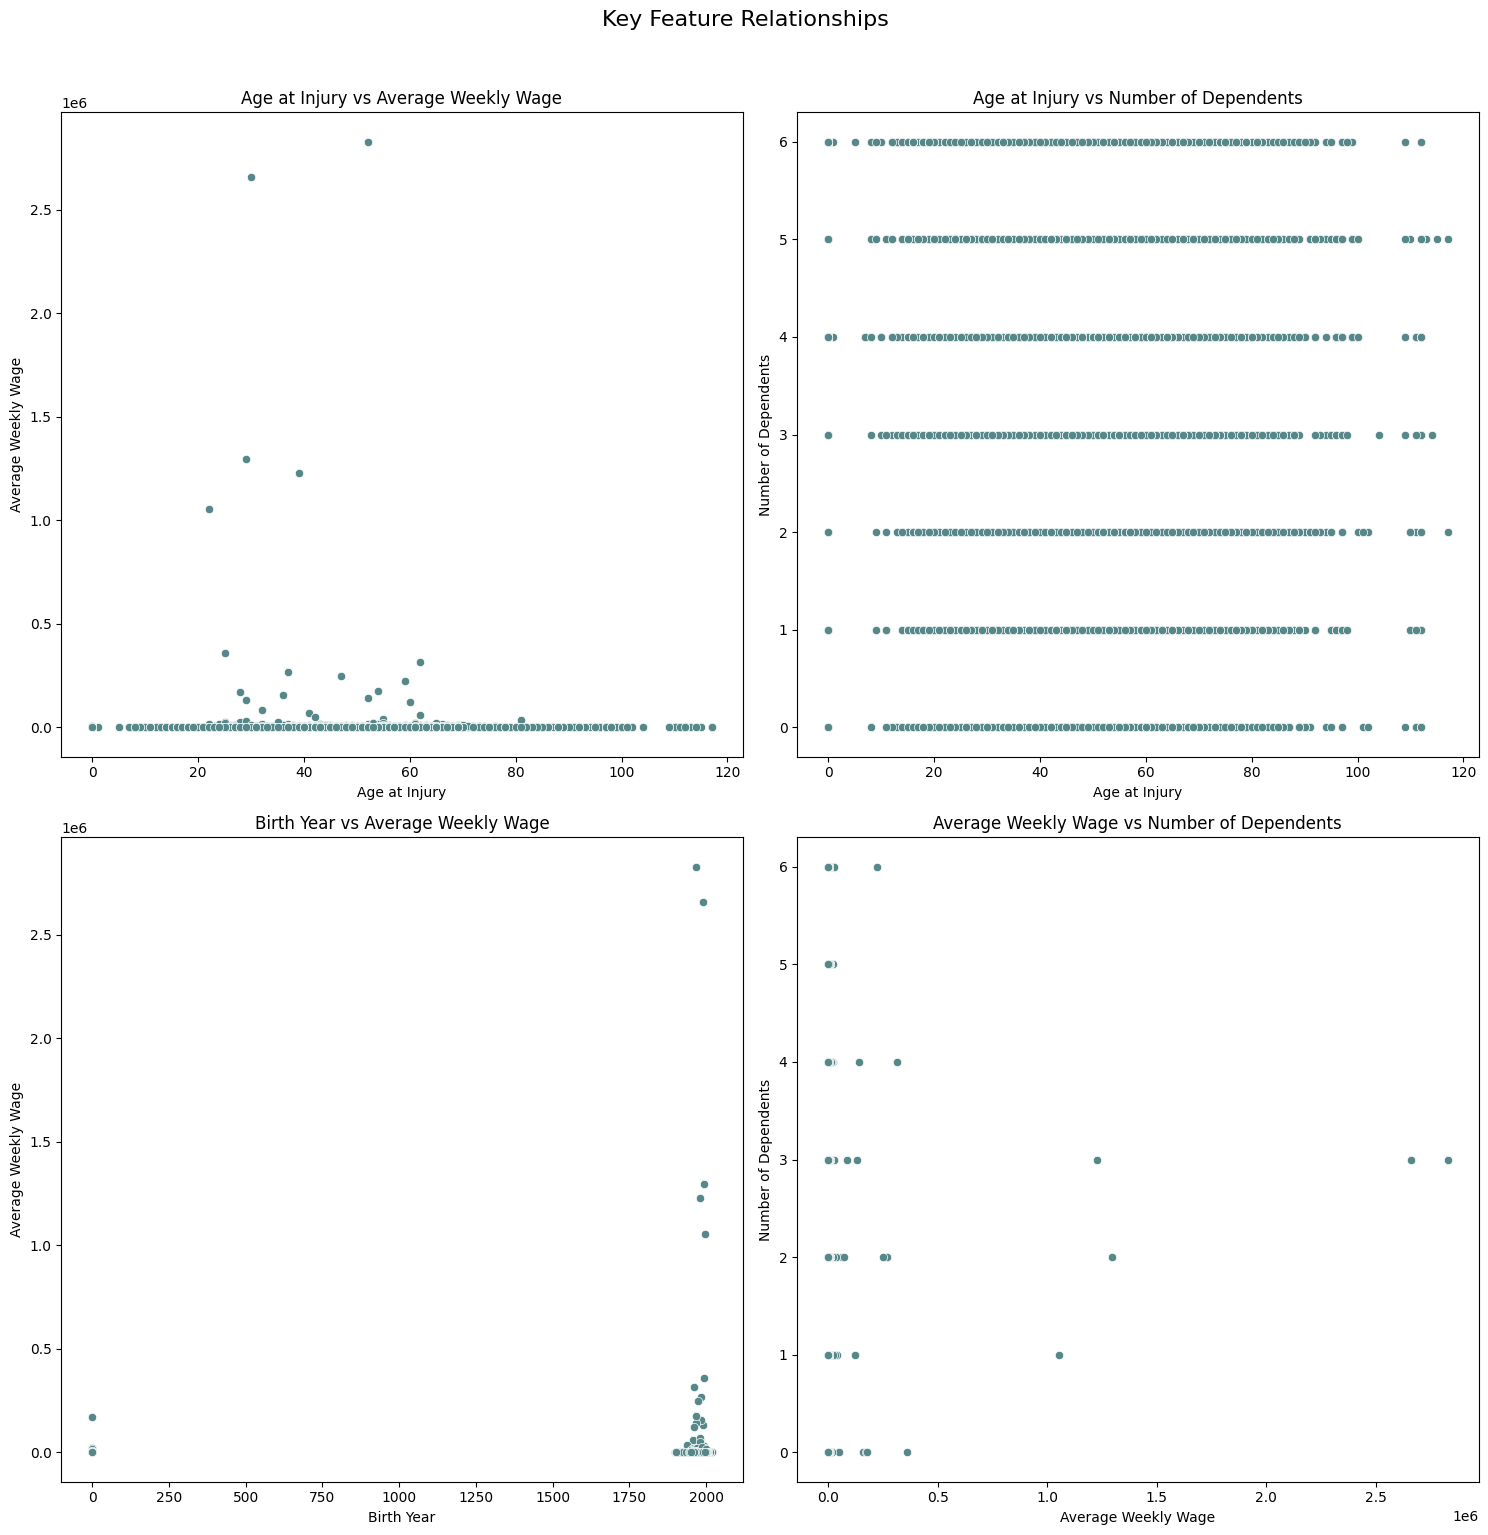

In [32]:
# Setting up the figure
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
fig.suptitle('Key Feature Relationships', fontsize=16, y=1.02)

# Age at Injury vs Average Weekly Wage
sns.scatterplot(data=numerical_df, 
                x='Age at Injury', 
                y='Average Weekly Wage',
                ax=axes[0, 0],
                color=plot_color)
axes[0, 0].set_title('Age at Injury vs Average Weekly Wage')

# Age at Injury vs Number of Dependents
sns.scatterplot(data=numerical_df, 
                x='Age at Injury', 
                y='Number of Dependents',
                ax=axes[0, 1],
                color=plot_color)
axes[0, 1].set_title('Age at Injury vs Number of Dependents')

# Birth Year vs Average Weekly Wage
sns.scatterplot(data=numerical_df, 
                x='Birth Year', 
                y='Average Weekly Wage',
                ax=axes[1, 0],
                color=plot_color)
axes[1, 0].set_title('Birth Year vs Average Weekly Wage')

# Average Weekly Wage vs Number of Dependents
sns.scatterplot(data=numerical_df, 
                x='Average Weekly Wage', 
                y='Number of Dependents',
                ax=axes[1, 1],
                color=plot_color)
axes[1, 1].set_title('Average Weekly Wage vs Number of Dependents')
    
plt.tight_layout()
plt.show()


With the plots above, we found some interesting relations that are worth exploring and treating:
 - In the first plot, we can detect some outliers of people that have really high weekly wages. We can also see that most wages have the value of 0.
 - In the second plot, we do not see any clear relationship between the two variables.
 - In the third plot, we see some `Birth Year` with the value of 0. Due to that, the plot does not show well the correlation between the feature. They must be removed.
 - In the last plot, we see some people that have high `Average Weekly Wage` and 1,2 or 3 dependents.

### <span style="color:#568789"> 7.3 Categorical Variables</span> 

Categorical variables represent characteristics or qualities that group data into distinct categories or labels. <br>  
In this dataset, the categorical variables are:

In [33]:
categorical_features = [
    'Alternative Dispute Resolution', 'Attorney/Representative',
    'Carrier Name',  'Carrier Type', 'County of Injury',
    'COVID-19 Indicator',  'District Name', 'Gender', 'Industry Code',
    'Industry Code Description',  'Medical Fee Region',  'WCIO Cause of Injury Code',
    'WCIO Cause of Injury Description',  'WCIO Nature of Injury Code',
    'WCIO Nature of Injury Description',  'WCIO Part Of Body Code',
    'WCIO Part Of Body Description',  'Zip Code', 'Agreement Reached',
    'WCB Decision', 'Claim Injury Type'
]

In [34]:
categorical_df = train_df[categorical_features]
categorical_df

,Alternative Dispute Resolution,Attorney/Representative,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,Gender,Industry Code,Industry Code Description,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Claim Injury Type
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
5393875,N,N,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,ST. LAWRENCE,N,SYRACUSE,M,44.0,RETAIL TRADE,...,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,2. NON-COMP
5393091,N,Y,ZURICH AMERICAN INSURANCE CO,1A. PRIVATE,WYOMING,N,ROCHESTER,F,23.0,CONSTRUCTION,...,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4. TEMPORARY
5393889,N,N,INDEMNITY INSURANCE CO OF,1A. PRIVATE,ORANGE,N,ALBANY,M,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,...,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,4. TEMPORARY
5393887,N,N,STATE INSURANCE FUND,2A. SIF,DUTCHESS,N,ALBANY,M,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,...,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,0.0,Not Work Related,2. NON-COMP
5393863,N,N,INDEMNITY INS. OF N AMERICA,1A. PRIVATE,SUFFOLK,N,HAUPPAUGE,M,44.0,RETAIL TRADE,...,31.0,"FALL, SLIP OR TRIP, NOC",10.0,CONTUSION,38.0,SHOULDER(S),11772,0.0,Not Work Related,3. MED ONLY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6165265,N,N,STATE INSURANCE FUND,2A. SIF,BRONX,N,NYC,M,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,...,45.0,COLLISION OR SIDESWIPE WITH ANOTHER VEHICLE,10.0,CONTUSION,42.0,LOWER BACK AREA,10467,0.0,Not Work Related,2. NON-COMP
6165285,N,N,WESCO INSURANCE CO,1A. PRIVATE,NASSAU,N,NYC,M,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,...,74.0,"FELLOW WORKER, PATIENT OR OTHER PERSON",37.0,INFLAMMATION,35.0,HAND,11590,0.0,Not Work Related,2. NON-COMP
6165506,N,N,SECURITY NATIONAL INSURANCE CO,1A. PRIVATE,ERIE,N,BUFFALO,F,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,...,98.0,"CUMULATIVE, NOC",80.0,"ALL OTHER CUMULATIVE INJURY, NOC",34.0,WRIST,14227,0.0,Not Work Related,4. TEMPORARY


1. Statistics

Here are some statistics about our categorical features:

In [35]:
categorical_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Agreement Reached,574024.0,0.046665,0.210921,0.0,0.0,0.0,0.0,1.0


As most of these variables are codes, these metrics do not say much about them. What we noticed was a negative value in the variable `WCIO Part Of Body Code`. Additionally, the mean of the variable `Agreement Reached`, which is binary, is 0.046665. That means that most of the cases did not reach to an agreement or are yet to reach.

Below, we explored the unique case of the negative value.

In [36]:
train_df[train_df['WCIO Part Of Body Code'] == -9]['WCIO Part Of Body Description'].unique()


array([], dtype=object)

As we can see, that negative value was due to multiple injuries.

2. Unique and missing values

To facilitate the exploration of the categorical data, the second step taken was to see the unique values that each categorical variable has.

In [37]:
# Check unique values of the categorical variables
for column in categorical_df.columns:
    print('=========================')
    print(categorical_df[column].value_counts())
    print(f'Missing values: {categorical_df[column].isna().sum()}')
    print('=========================')
    print()

Alternative Dispute Resolution
N    571410
Y      2609
U         5
Name: count, dtype: int64
Missing values: 0

Attorney/Representative
N    392291
Y    181733
Name: count, dtype: int64
Missing values: 0

Carrier Name
STATE INSURANCE FUND            111144
POLICE, FIRE, SANITATION         21602
AMERICAN ZURICH INSURANCE CO     17540
CHARTER OAK FIRE INS CO          17176
INDEMNITY INS. OF N AMERICA      14366
                                 ...  
LOWES HOME CENTERS INC               1
WEST BEND MUTUAL INSURANCE           1
LIVINGSTON-STEUBEN-                  1
NEW YORK MUTUAL CASUALTY             1
HERMON-DEKALB CENTRAL                1
Name: count, Length: 2046, dtype: int64
Missing values: 0

Carrier Type
1A. PRIVATE                                    285366
3A. SELF PUBLIC                                121920
2A. SIF                                        111144
4A. SELF PRIVATE                                52788
UNKNOWN                                          1774
5D. SPECIAL

*Conclusions about Categorical variables*
- **Alternative Dispute Resolution**: 
    - Majority with 'N' (571,412)
    - Minor counts of 'Y' (2,609) and 'U' (5), indicating few unspecified cases
- **Carrier Name**: 
    - Diverse field with *STATE INSURANCE FUND* as the largest category
    - Total of 2,046 unique insurance providers
- **Claim Injury Type**: 
    - Target variable with 8 distinct categories
- **County of Injury**: 
    - 63 unique counties, with significant representation from *SUFFOLK* and *QUEENS*
- **Attorney/Representative**: 
    - Majority of claims without legal representation ('N': 392,291 vs 'Y': 181,735)
- **Gender**: 
    - Gender variable includes unknown values ('U' and 'X'), which will be replaced with 'Unknown'
- **Industry Code Description**: 
    - Significant representation in sectors like *Health Care* and *Public Administration*



Following, we decided to explore the distribution of the categorical features.

3. Barcharts

To do so, we decided to separate the variables that had several unique values from the ones with a few values. To do so, we started by creating a variable that save the number of unique values each categorical feature has.

This information is very useful because:

- It helps you understand the complexity of each feature

- It guides how you should visualize each feature:
    - Binary features might be best as pie charts
    - Features with few categories work well as bar plots
    - Features with many categories might need to be grouped or shown partially


- It helps identify potential data quality issues
    - Too many unique values might indicate spelling errors or inconsistent data entry
    - Too few unique values might indicate missing categories

In [38]:
unique_counts = categorical_df.nunique().sort_values(ascending=True)
print("Number of unique values in each feature:")
print(unique_counts)

Number of unique values in each feature:
WCB Decision                             1
Attorney/Representative                  2
Agreement Reached                        2
COVID-19 Indicator                       2
Alternative Dispute Resolution           3
Gender                                   4
Medical Fee Region                       5
Carrier Type                             8
District Name                            8
Claim Injury Type                        8
Industry Code Description               21
Industry Code                           25
WCIO Part Of Body Description           54
WCIO Nature of Injury Description       56
WCIO Nature of Injury Code              57
WCIO Part Of Body Code                  58
County of Injury                        63
WCIO Cause of Injury Description        74
WCIO Cause of Injury Code               78
Carrier Name                          2046
Zip Code                             10061
dtype: int64


As we can see above, there is a feature with only one value and some tha have 10060 values. `Carrier Name` and `Zip Code`  have too many unique values. As such, seeing the values that are more frequent would be a good analysis that we will try.

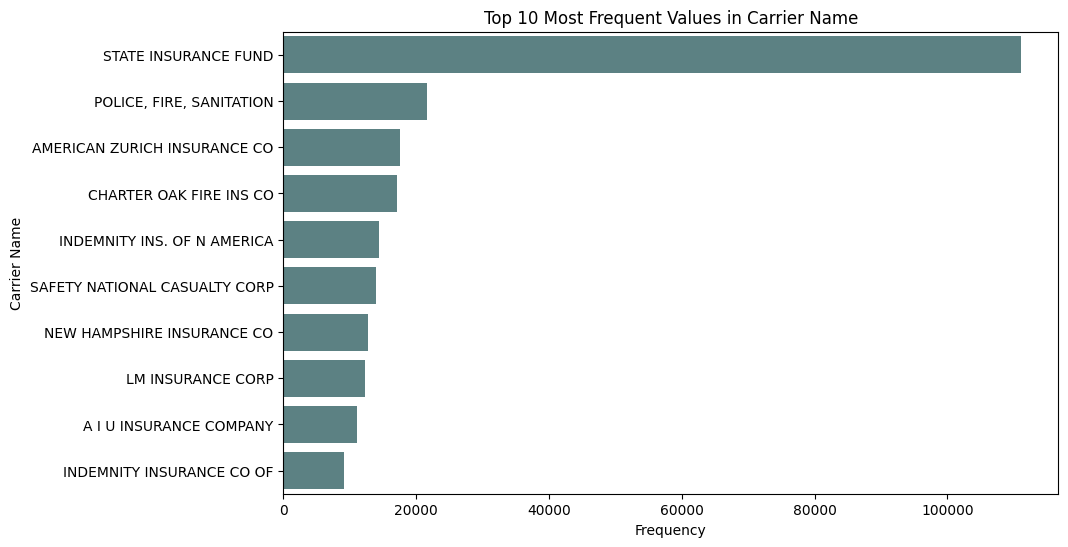

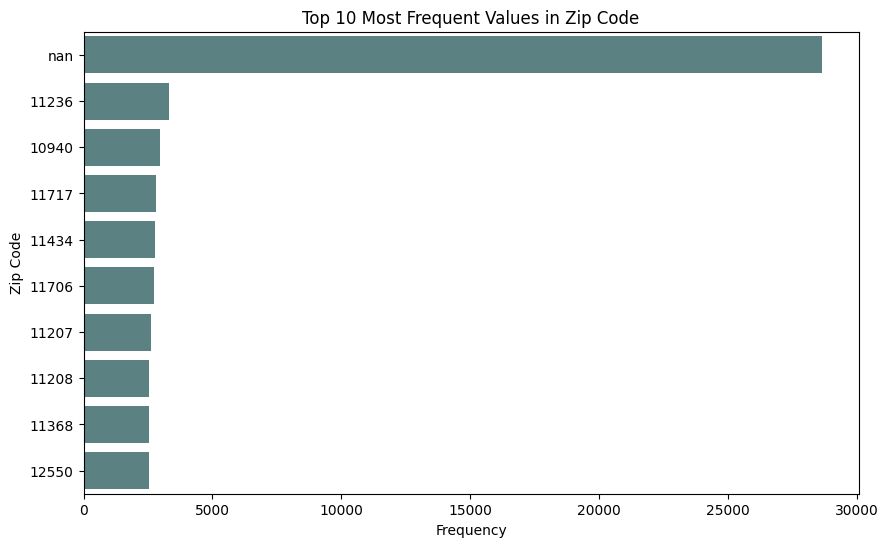

In [39]:
# Defining the features to visualize
features_to_visualize = ['Carrier Name', 'Zip Code']

for feature in features_to_visualize:
    top_values = categorical_df[feature].value_counts().head(10)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_values.values, y=top_values.index, color=plot_color)
    plt.title(f'Top 10 Most Frequent Values in {feature}')
    plt.xlabel('Frequency')
    plt.ylabel(feature)
    plt.show()


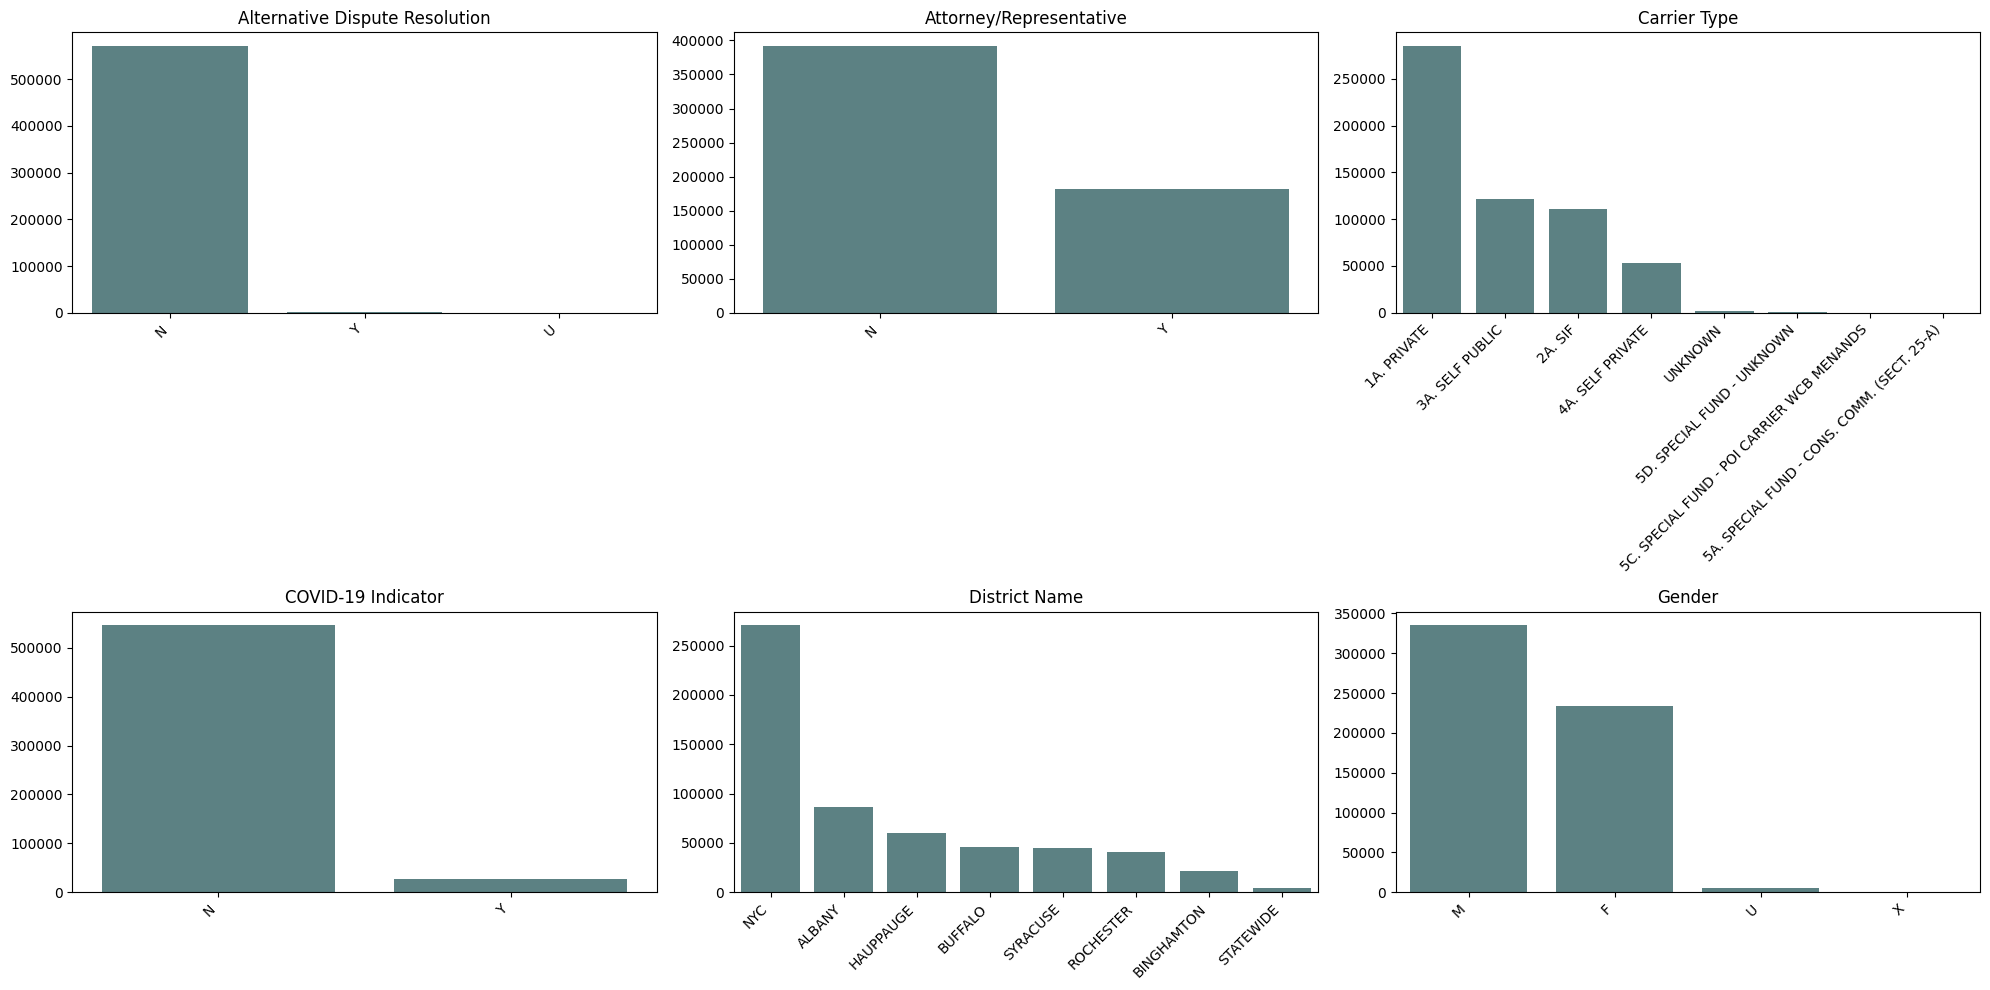

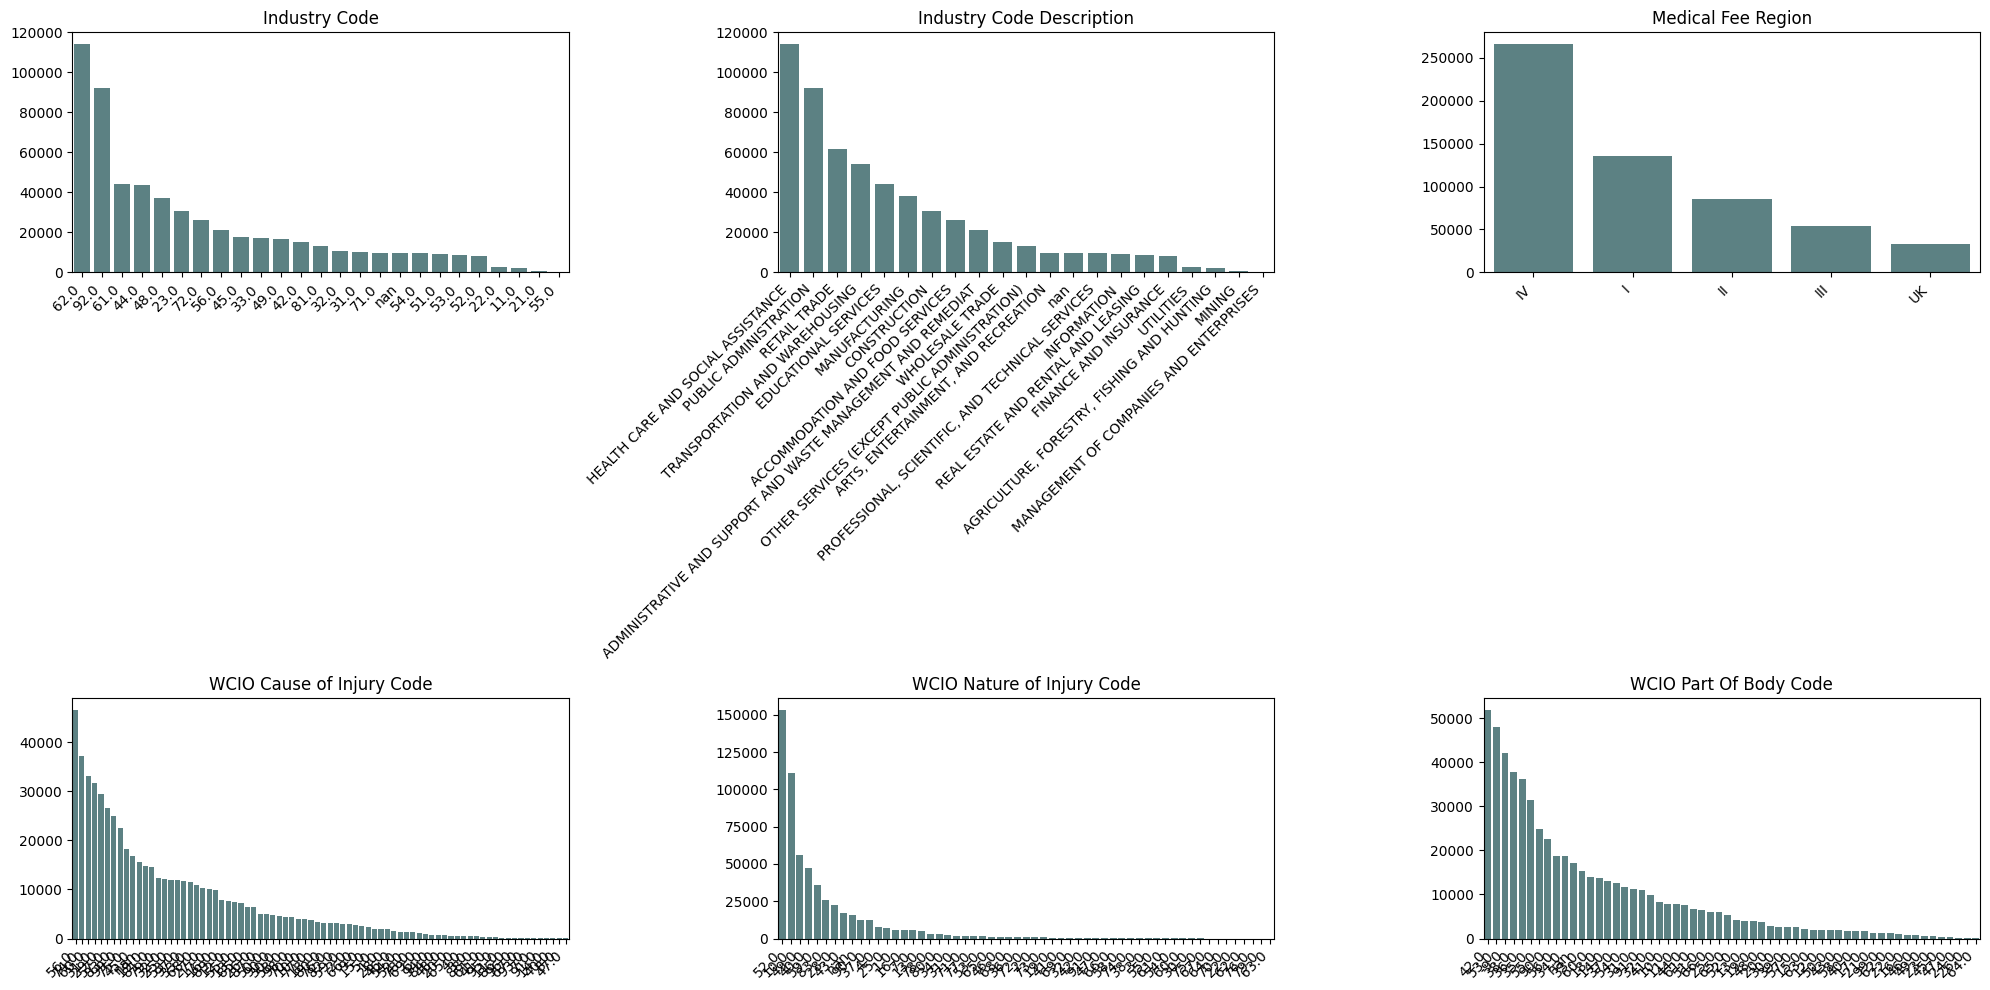

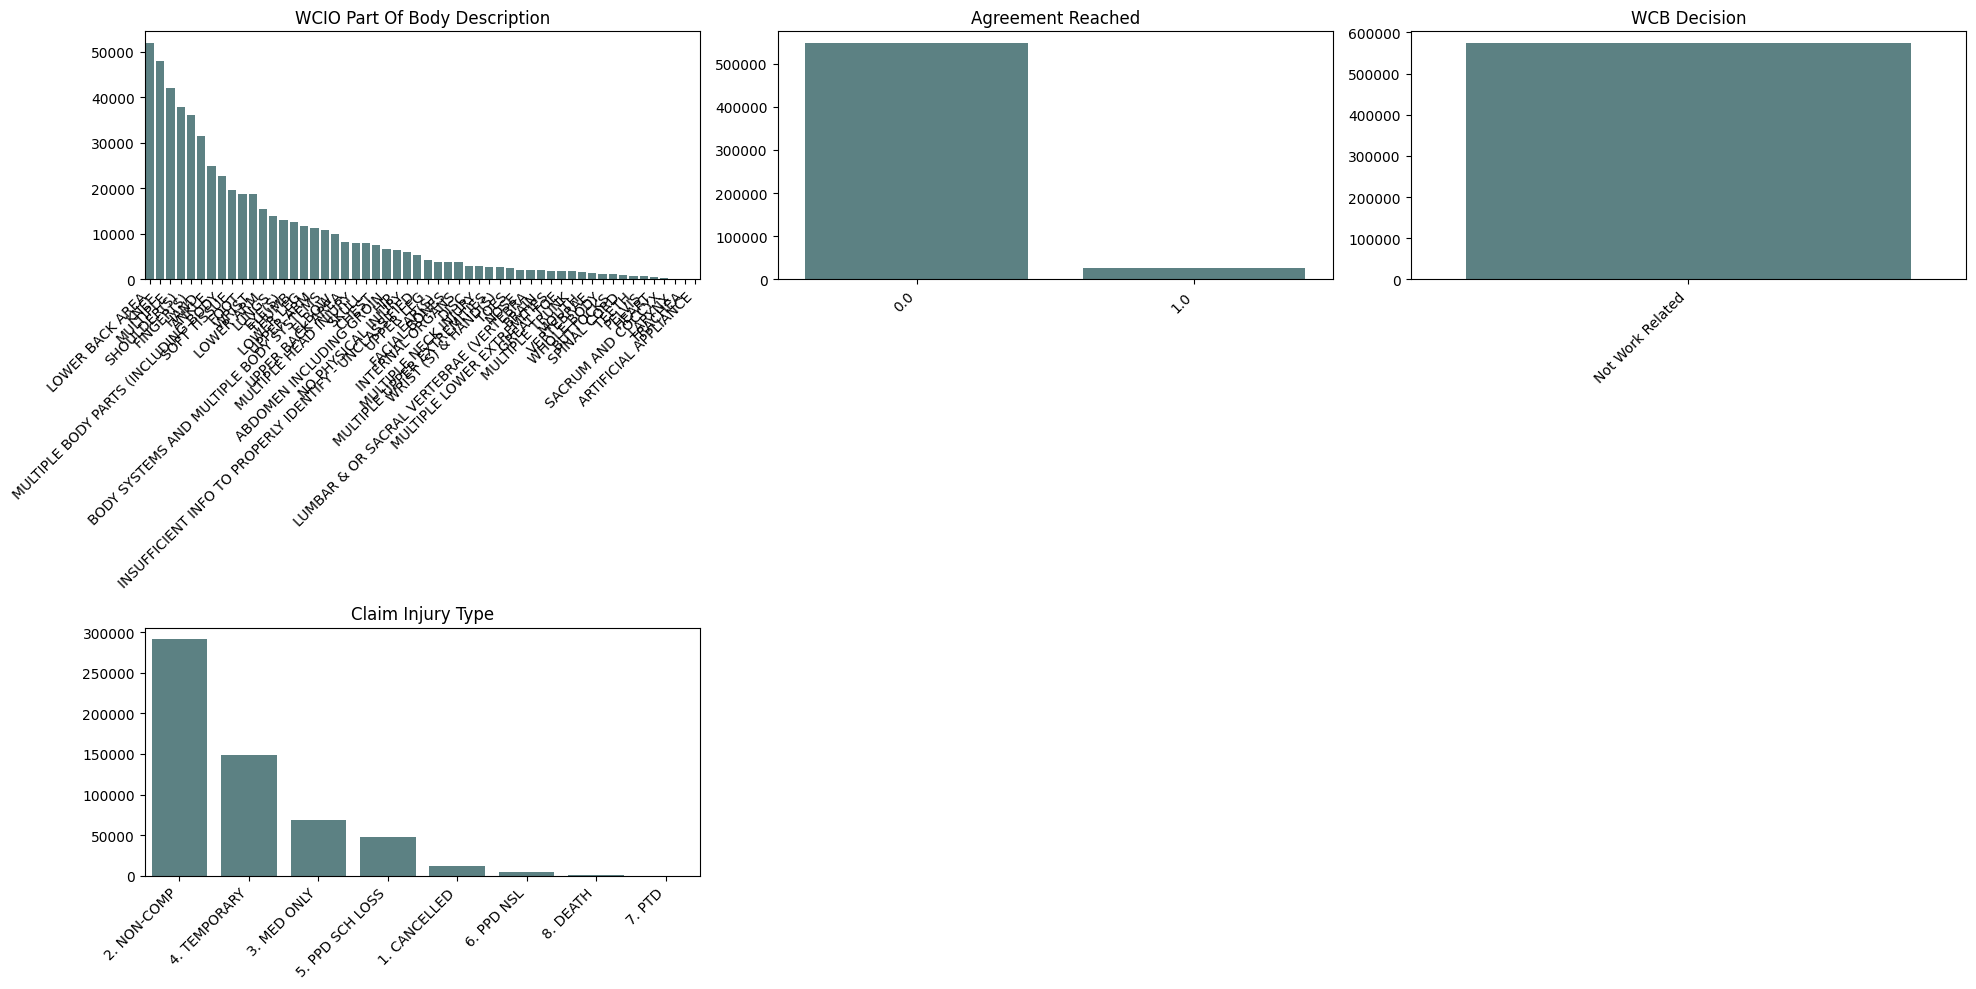

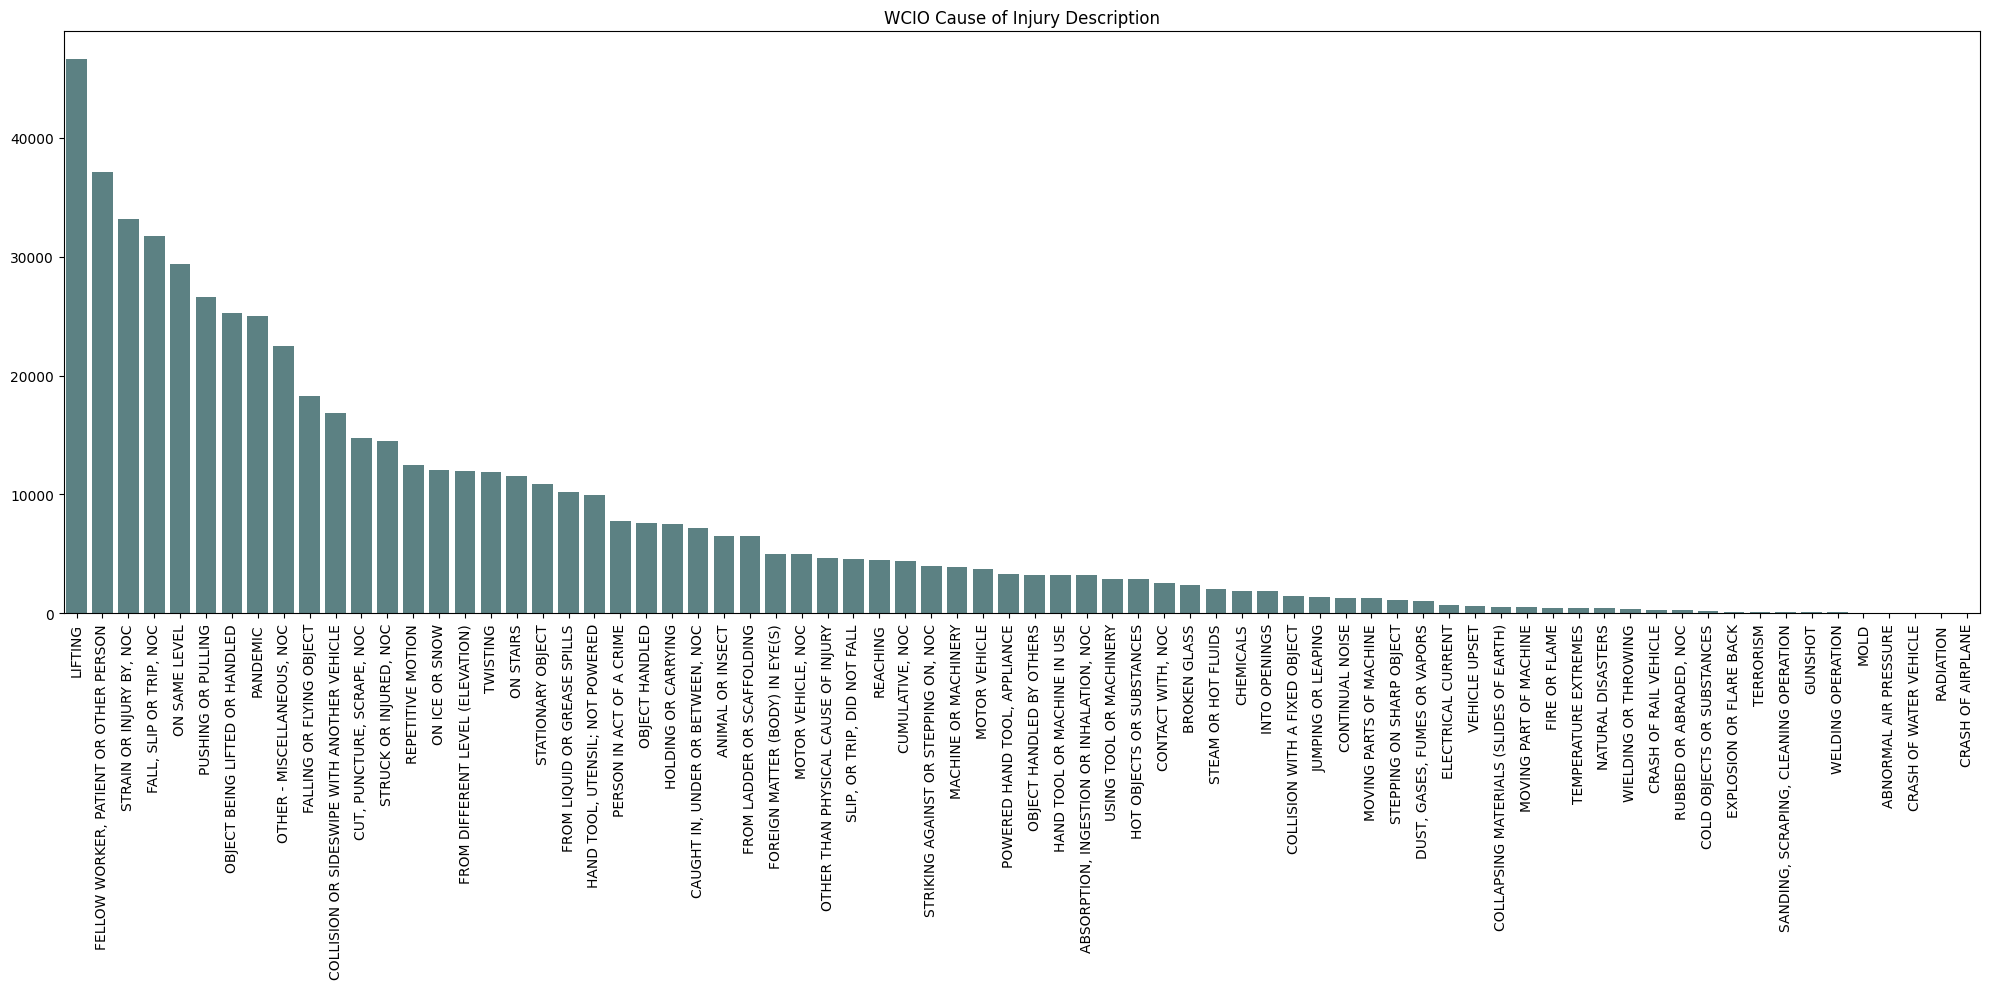

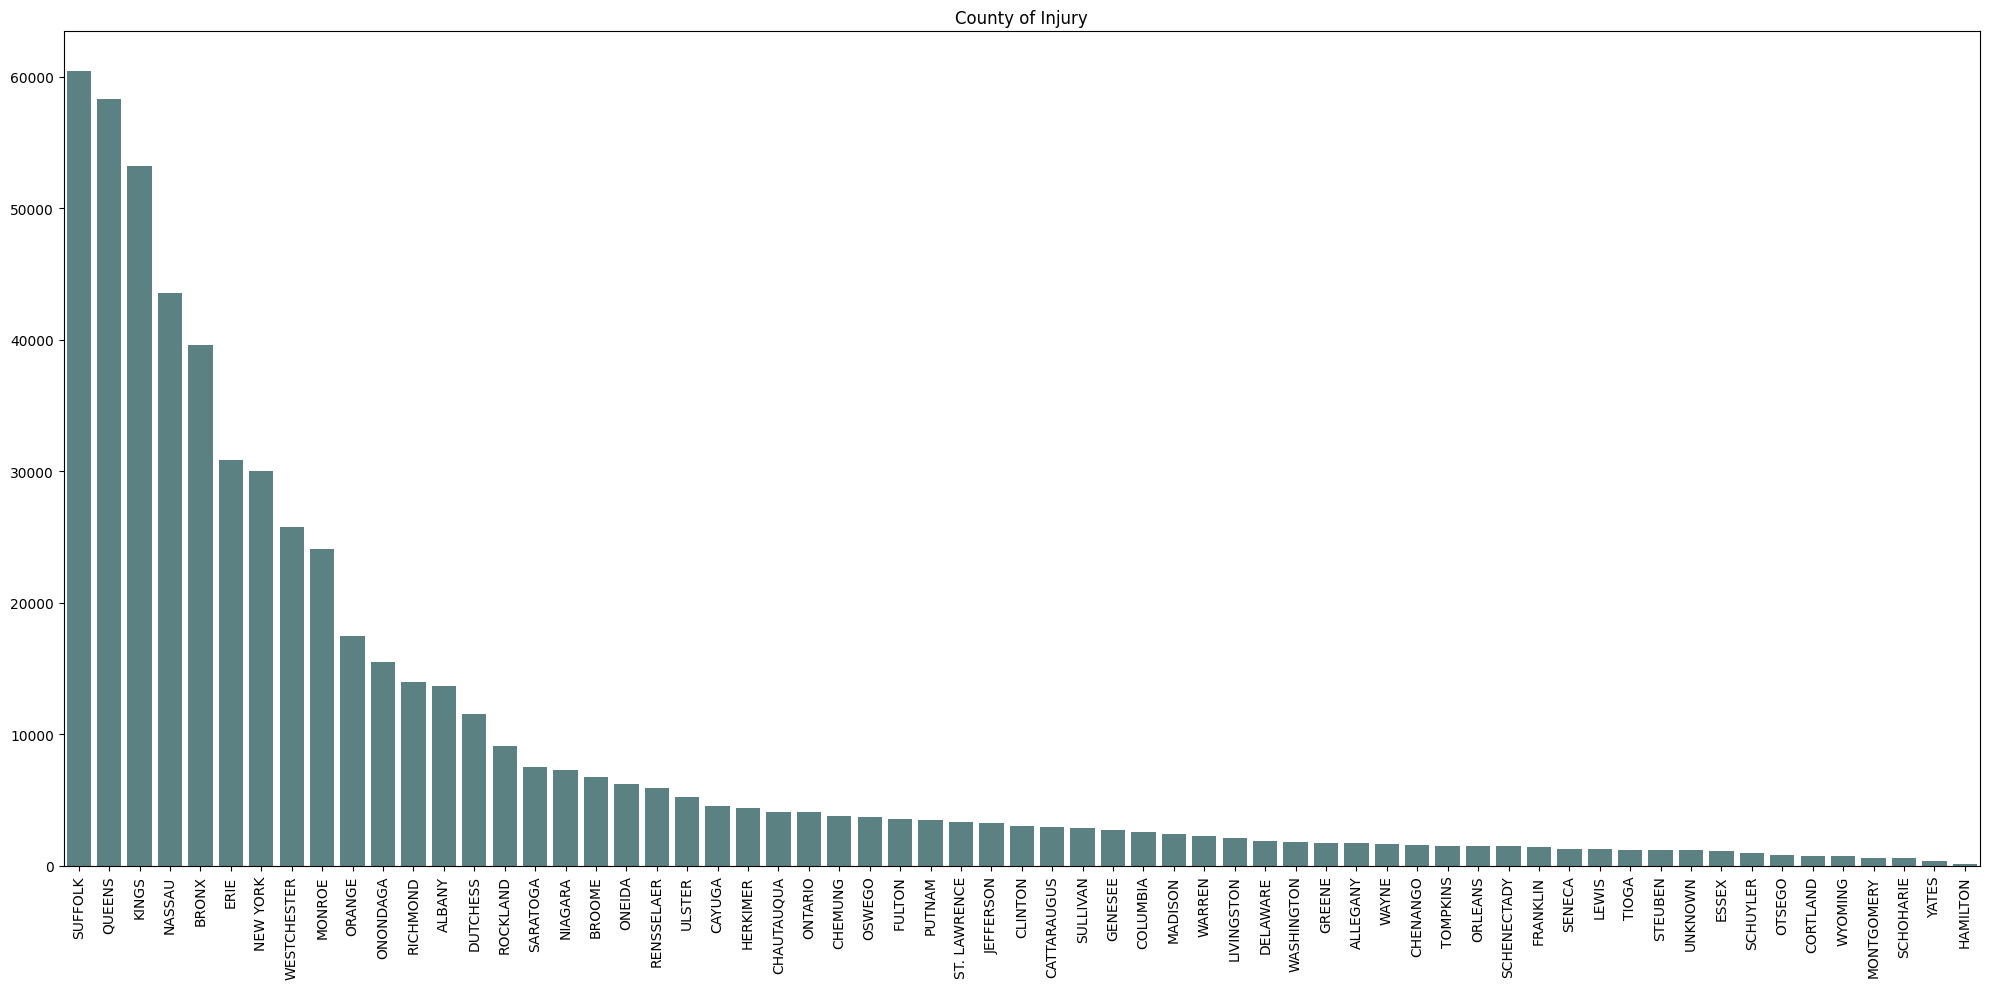

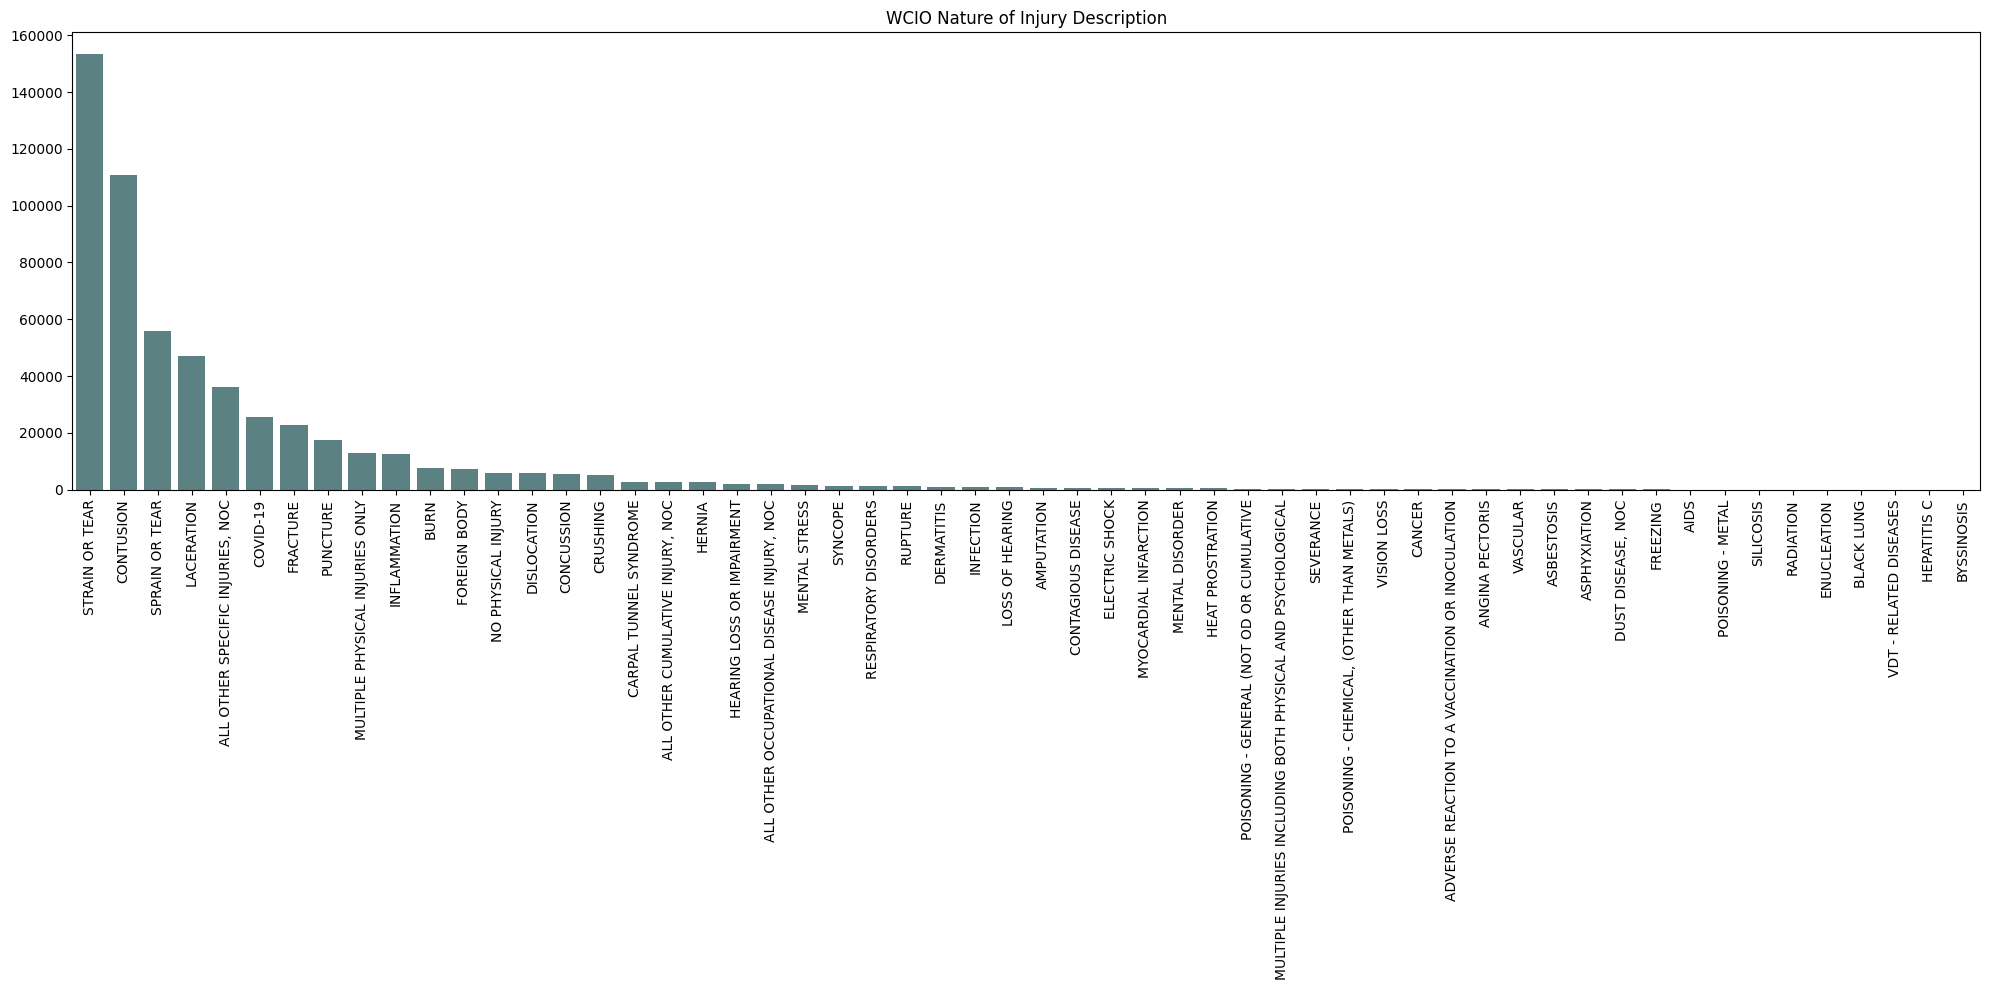

In [40]:
def plot_categorical_features(categorical_df, max_features_per_plot=6, figsize=(20, 15), 
                              exclude_features=['Carrier Name', 'WCIO Cause of Injury Description', 'County of Injury', 'WCIO Nature of Injury Description', 'Zip Code']):
    filtered_features = [feat for feat in categorical_df.columns if feat not in exclude_features]
    num_features = len(filtered_features)
    num_plots = (num_features + max_features_per_plot - 1) // max_features_per_plot

    for plot_idx in range(num_plots):
        start_idx = plot_idx * max_features_per_plot
        end_idx = min((plot_idx + 1) * max_features_per_plot, num_features)
        current_features = filtered_features[start_idx:end_idx]
        
        fig, axes = plt.subplots(
            nrows=(len(current_features) + 2) // 3, 
            ncols=3, 
            figsize=(20, 5 * ((len(current_features) + 2) // 3))
        )
        
        axes = axes.flatten()
        
        for i, feature in enumerate(current_features):
            value_counts = categorical_df[feature].value_counts()
        
            sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[i], color=plot_color)
            axes[i].set_title(feature)

            # Set the ticks first, then set the tick labels
            axes[i].set_xticks(range(len(value_counts.index)))
            axes[i].set_xticklabels(value_counts.index, rotation=45, ha='right')
            axes[i].set_xlabel(None)
        
        for j in range(i+1, len(axes)):
            axes[j].axis('off')
        
        plt.tight_layout()
        plt.show()

    # Plot the excluded features separately
    excluded_features = ['WCIO Cause of Injury Description', 'County of Injury','WCIO Nature of Injury Description']
    for feature in excluded_features:
        plt.figure(figsize=(20, 10))
        value_counts = categorical_df[feature].value_counts()
        
        plt.subplot(1, 1, 1)
        sns.barplot(x=value_counts.index, y=value_counts.values, color=plot_color)
        plt.title(feature)
        plt.xticks(rotation=90)
        plt.xlabel(None)
        plt.tight_layout()
        plt.show()

plot_categorical_features(categorical_df)


# <span style="color:yellow">FRANCISCO</span>
Retirar a função para utils quando concluído

Achas necessário dar plot das descriptions?

Consegues passar as outras visualizaçóes para funções para o notebook estar mais limpo please?


4. Number of cases in each county

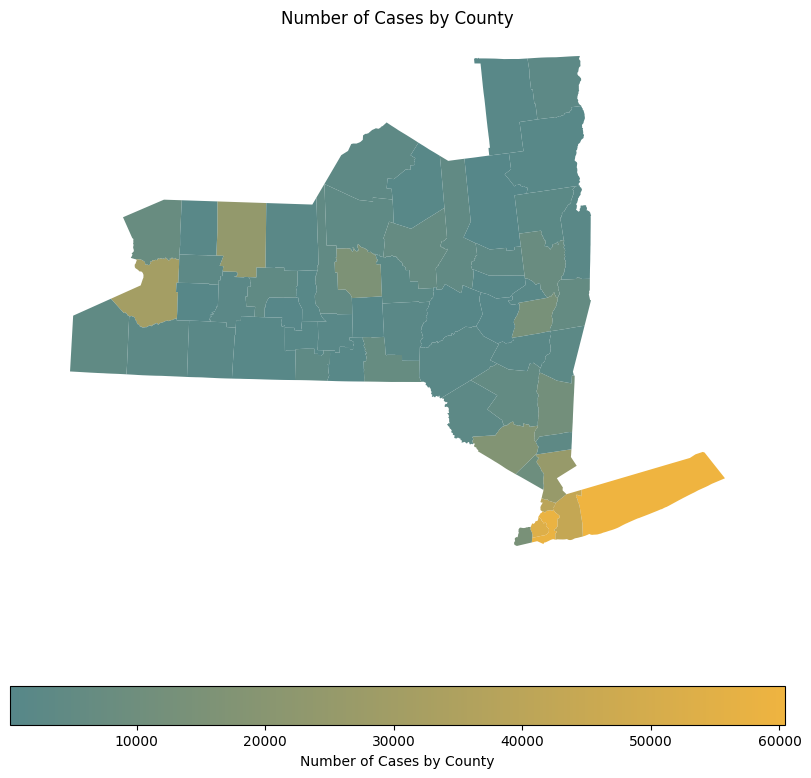

In [41]:
plot_cases_by_county(train_df)

Above, we can see a concentration of cases on the counties on the bottom right.

### <span style="color:#568789"> 7.4 Date Variables</span> 

After exploring the numerical and categorical data, we will now explore the date related variables. We started by defining the date features.

In [42]:
date_features = ['Accident Date', 'Assembly Date', 'C-2 Date', 'C-3 Date', 'First Hearing Date']

Here is a dataframe with dates only.

In [43]:
date_train_df = train_df[date_features]
date_train_df

,Accident Date,Assembly Date,C-2 Date,C-3 Date,First Hearing Date
Claim Identifier,,,,,
5393875,2019-12-30,2020-01-01,2019-12-31,NaT,NaT
5393091,2019-08-30,2020-01-01,2020-01-01,2020-01-14,2020-02-21
5393889,2019-12-06,2020-01-01,2020-01-01,NaT,NaT
5393887,2019-12-30,2020-01-01,2019-12-31,NaT,NaT
5393863,2019-12-26,2020-01-01,2019-12-31,NaT,NaT
...,...,...,...,...,...
6165265,2022-12-14,2022-12-30,2022-12-30,NaT,NaT
6165285,2022-12-15,2022-12-31,2022-12-31,NaT,NaT
6165506,2022-12-13,2022-12-31,2022-12-31,NaT,NaT


Next, we can see a small exploration of our date variables.

In [44]:
date_train_df.describe()

,Accident Date,Assembly Date,C-2 Date,C-3 Date,First Hearing Date
count,570337,574024,559466,187243,150796
mean,2021-04-28 21:00:27.892982272,2021-07-19 19:02:12.053013760,2021-07-16 20:11:19.865443072,2021-07-26 21:33:31.095741696,2022-03-19 05:03:27.506829568
min,1961-09-06 00:00:00,2020-01-01 00:00:00,1996-01-12 00:00:00,1992-11-13 00:00:00,2020-01-30 00:00:00
25%,2020-09-14 00:00:00,2020-10-27 00:00:00,2020-11-06 00:00:00,2020-10-27 00:00:00,2021-06-01 00:00:00
50%,2021-06-27 00:00:00,2021-07-30 00:00:00,2021-08-09 00:00:00,2021-07-21 00:00:00,2022-03-09 00:00:00
75%,2022-03-21 00:00:00,2022-04-19 00:00:00,2022-04-26 00:00:00,2022-04-20 00:00:00,2023-01-11 00:00:00
max,2023-09-29 00:00:00,2022-12-31 00:00:00,2024-06-01 00:00:00,2024-05-31 00:00:00,2024-06-07 00:00:00


Above, we can see that the earliest `Accident Date` was in 1961 but the first `Assembly Date` was in 2020. Additionally, `C2-Date` and `C3-Date`where in 1996 and 1992 respectively. With this dates, we can see that some information is missing.

After, we started to do some visualizations related with our dates.

C:\Users\abdar\AppData\Local\Temp\ipykernel_18888\2484309413.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_train_df['Accident Year'] = date_train_df['Accident Date'].dt.year
C:\Users\abdar\AppData\Local\Temp\ipykernel_18888\2484309413.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_train_df['Accident Month'] = date_train_df['Accident Date'].dt.month


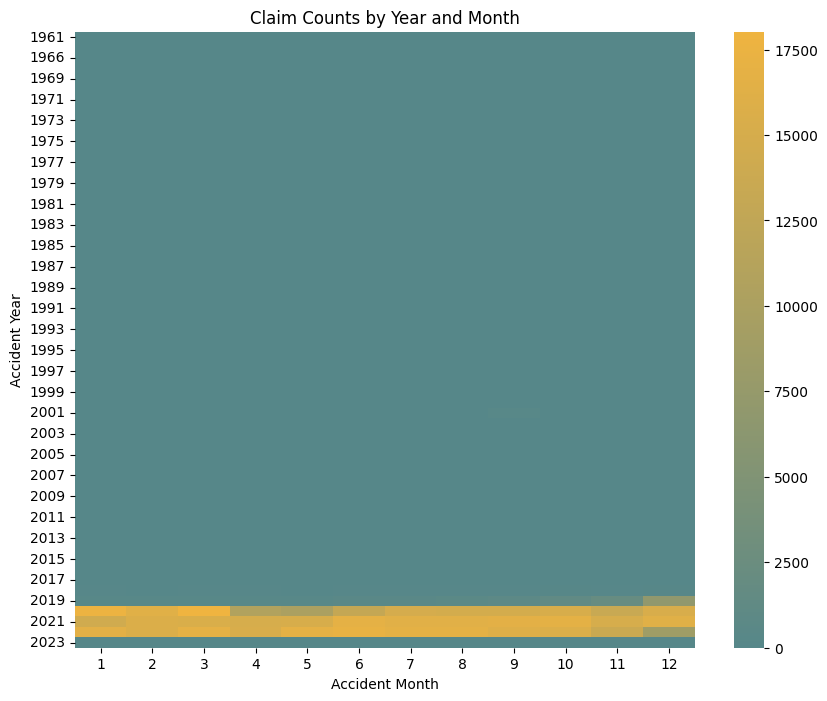

In [45]:
# Extract year and month from Accident Date for grouping
date_train_df['Accident Year'] = date_train_df['Accident Date'].dt.year
date_train_df['Accident Month'] = date_train_df['Accident Date'].dt.month

# Group the data by 'Accident Year' and 'Accident Month' to count the number of claims
claim_counts = date_train_df.groupby(['Accident Year', 'Accident Month']).size().unstack(fill_value=0)

claim_counts.index = claim_counts.index.astype(int)  # Convert Accident Year to int
claim_counts.columns = claim_counts.columns.astype(int)  # Convert Accident Month to int

# Plot the heatmap without annotations and with the custom color map
plt.figure(figsize=(10, 8))
sns.heatmap(claim_counts, annot=False, cmap=custom_cmap)
plt.title('Claim Counts by Year and Month')
plt.xlabel('Accident Month')
plt.ylabel('Accident Year')
plt.show()


Above, we can see that most accidents appear between the end of 2019 and the and of 2022. There is many accidents in January and March of 2020 and 2022 and the summer months of 2021 and 2022 also have a high number of accidents registered.

## <span style="color:#568789"> 8. Export datasets</span> 

In [46]:
folder_path = "./eda_data/"

if not os.path.exists(folder_path):
    os.makedirs(folder_path)
    print(f"Folder '{folder_path}' created.")
else:
    print(f"Folder '{folder_path}' already exists.")

Folder './eda_data/' created.


In [47]:
train_df.to_csv('./eda_data/train_data.csv', index = True)
test_df.to_csv('./eda_data/test_data.csv', index = True)